# Personal Loan Campaign_Project_GAP

By: Glen A Patterson

Date: 9-23-2022

## Problem Statment:

AllLife Bank is a US bank that wants to run a campaign that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective:

1.  To predict whether a liability customer will buy a personal loan or not.
2.  Which variables are most significant.
3.  Which segment of customers should be targeted more.

## Data Dictionary:

- ID:  Customer ID
- Age:  Customer's age in completed years
- Experience:  Number of years of professional experience
- Income:  Annual income of the customer (in thousand dollars)
- ZIP Code:  Home Address ZIP code
- Family:  The family size of the customer
- CCAvg:  Average spending on credit cards per month (in thousand dollars)
- Education:  Education Level - 1: Undergrad  2: Graduate 3: Advanced/Professional
- Mortgage:  Value of house mortgage if any (in thousand dollars)
- Personal_Loan:  Did this customer accept the personal loan offered in the last campaign?
- Securities_Account:  Does the customer have securities account with the bank?
- CD_Account:  Does the customer have a certificate of deposit (CD) account with the bank?
- Online:  Do customers use internet banking facilities?
- CreditCard:  Does the customer use a credit card issued by any other Bank (excluding AllLife Bank)?

## Importing the necessary libraries:

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to deal with zip codes
from uszipcode import SearchEngine

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 50)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build the Logistic regression_model
from sklearn.linear_model import LogisticRegression

# to check model performance
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# to build and visualize the Decision Tree_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Hyperparameter Tuning of the Decision Tree to build a better model
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [2]:
# Load the csv file and call the dataframe "Loan"
Loan = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# Make a copy of original dataframe "Loan" and call it "data".  We will be modifying this dataframe
data = Loan.copy()

<IPython.core.display.Javascript object>

In [4]:
# Observing the head of the first 10 rows of the dataset to make sure it loaded correctly and examine the data.
data.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

<IPython.core.display.Javascript object>

In [5]:
# Get information about the number of rows and columns in the dataset (rows, columns)
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

We can see that there is 5,000 rows and 14 columns

In [6]:
# See if there is any duplicated rows
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplicated rows in dataset.

In [7]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

- There is no missing data in this dataset
- There is 547.0KB memory used
- There is one "float64", thirteen "int64" data types

In [8]:
# Explore the Statistics in data and look for outliers in dataset
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<IPython.core.display.Javascript object>

In [9]:
# Find the number of unknown Experience in this dataset
data[data["Experience"] < 0]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
89      90   25          -1     113    94303       4   2.30          3   
226    227   24          -1      39    94085       2   1.70          2   
315    316   24          -2      51    90630       3   0.30          3   
451    452   28          -2      48    94132       2   1.75          3   
524    525   24          -1      75    93014       4   0.20          1   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4411  4412   23          -2      75    90291       2   1.80          2   
4481  4482   25          -2      35    95045       4   1.00          3   
4514  4515   24          -3      41    91768       4   1.00          3   
4582  4583   25          -1      69    92691       3   0.30          3   
4957  4958   29          -1      50    95842       2   1.75          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
89           0              0                   0           0       0   
226          0              0                   0           0       0   
315          0              0                   0           0       1   
451         89              0                   0           0       1   
524          0              0                   0           0       1   
...        ...            ...                 ...         ...     ...   
4411         0              0                   0           0       1   
4481         0              0                   0           0       1   
4514         0              0                   0           0       1   
4582         0              0                   0           0       1   
4957         0              0                   0           0       0   

      CreditCard  
89             1  
226            0  
315            0  
451            0  
524            0  
...          ...  
4411           1  
4481           0  
4514           0  
4582           0  
4957           1  

[52 rows x 14 columns]

<IPython.core.display.Javascript object>

- Some values are negitive experience
- -2 and -3 need to be converted to just -1: "unknown experience"

In [10]:
# convert < 0 Experience to -1 "unkown experience"
for idx, row in data.iterrows():
    if data.loc[idx, "Experience"] < 0:
        data.loc[idx, "Experience"] = -1

<IPython.core.display.Javascript object>

In [11]:
# Find the number of different ZIP codes in this dataset
data["ZIPCode"].nunique()

467

<IPython.core.display.Javascript object>

- There are 467 different Zip Codes

In [12]:
# Converting the zip code in this dataset to County
for idx, num in enumerate(data["ZIPCode"]):
    # Zip codes not found in uszipcode package and returns nothing
    if (num == 92717) or (num == 92634):
        data.loc[idx, "County"] = "Orange County"
    elif num == 93077:
        data.loc[idx, "County"] = "Ventura County"
    elif num == 96651:
        data.loc[idx, "County"] = "Other County"
    else:
        # convert zipcode to county locations
        engine = SearchEngine()
        zipcode = engine.by_zipcode(num)
        data.loc[idx, "County"] = zipcode.county

<IPython.core.display.Javascript object>

In [13]:
# Find the number of different County in this dataset
data["County"].nunique()

39

<IPython.core.display.Javascript object>

- There is 39 different County's in this dataset

## Exploratory Data Analysis

### Univariate analysis:

In [14]:
# function to create labeled barplots
def labeled_barplot(data, feature, figuresize=3, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, figuresize * 6))
    else:
        plt.figure(figsize=(n + 2, figuresize * 6))

    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# This is a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observation on Age

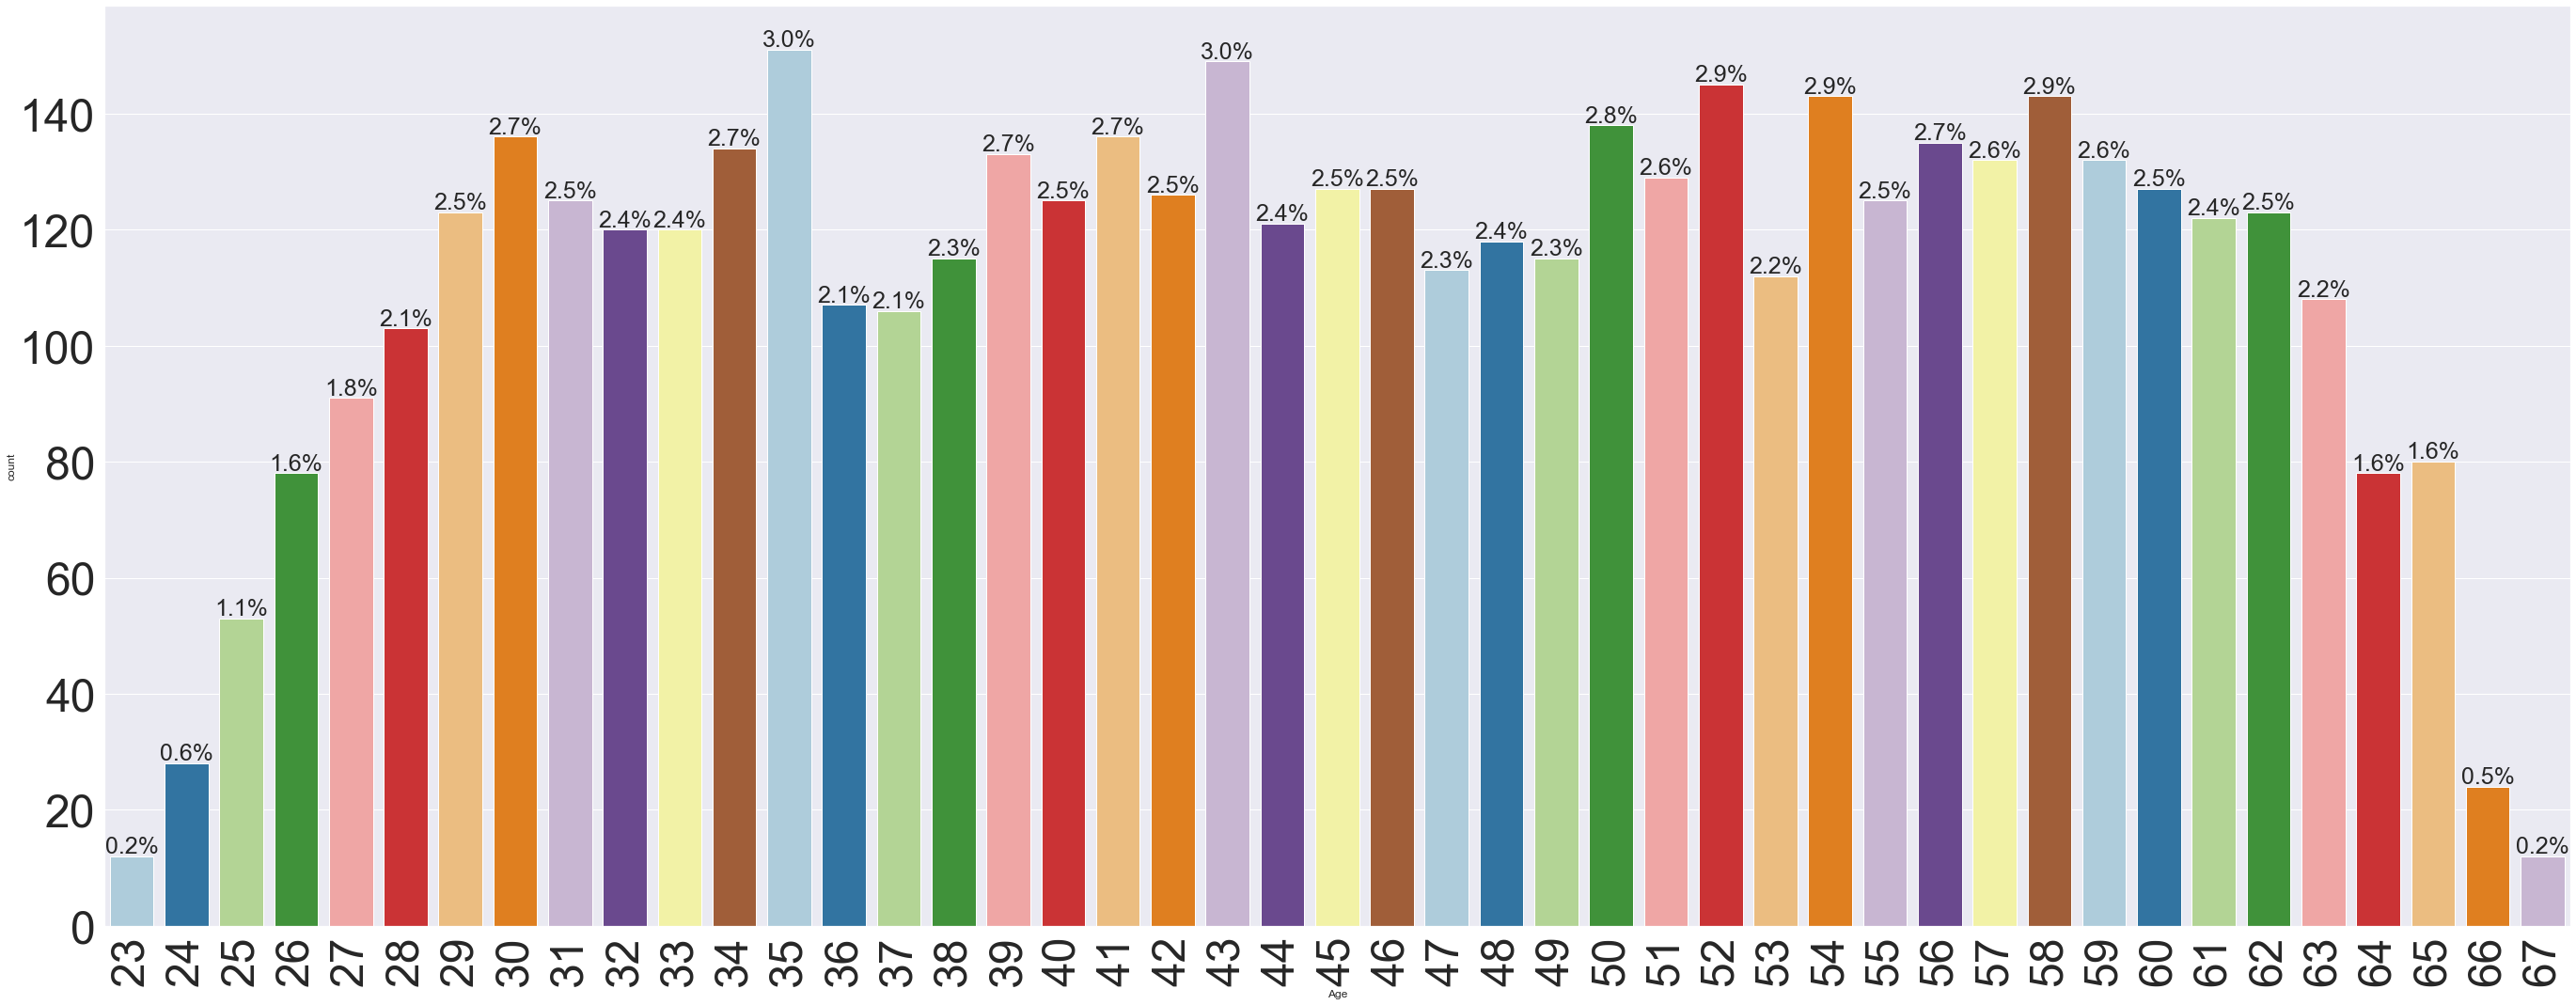

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "Age", perc=True)

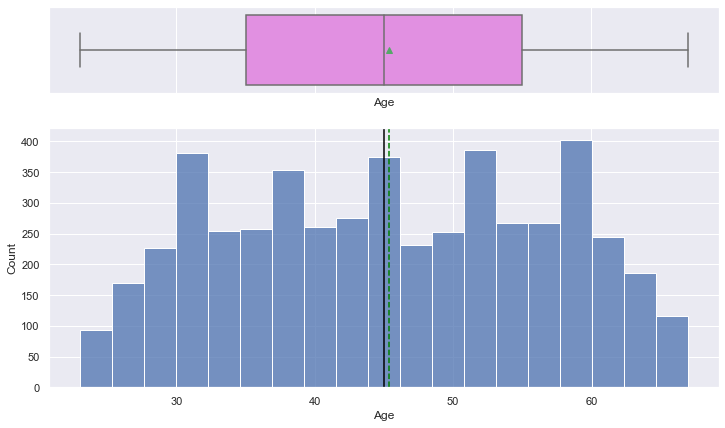

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "Age")

- The lowest age is 23 and the largest age is 67
- Age groups are distributed evenly from age 28-63
- The IQR is between age 35 and 55 with a mean of 45.3
- There is no outliers in age

#### Observation on Experience

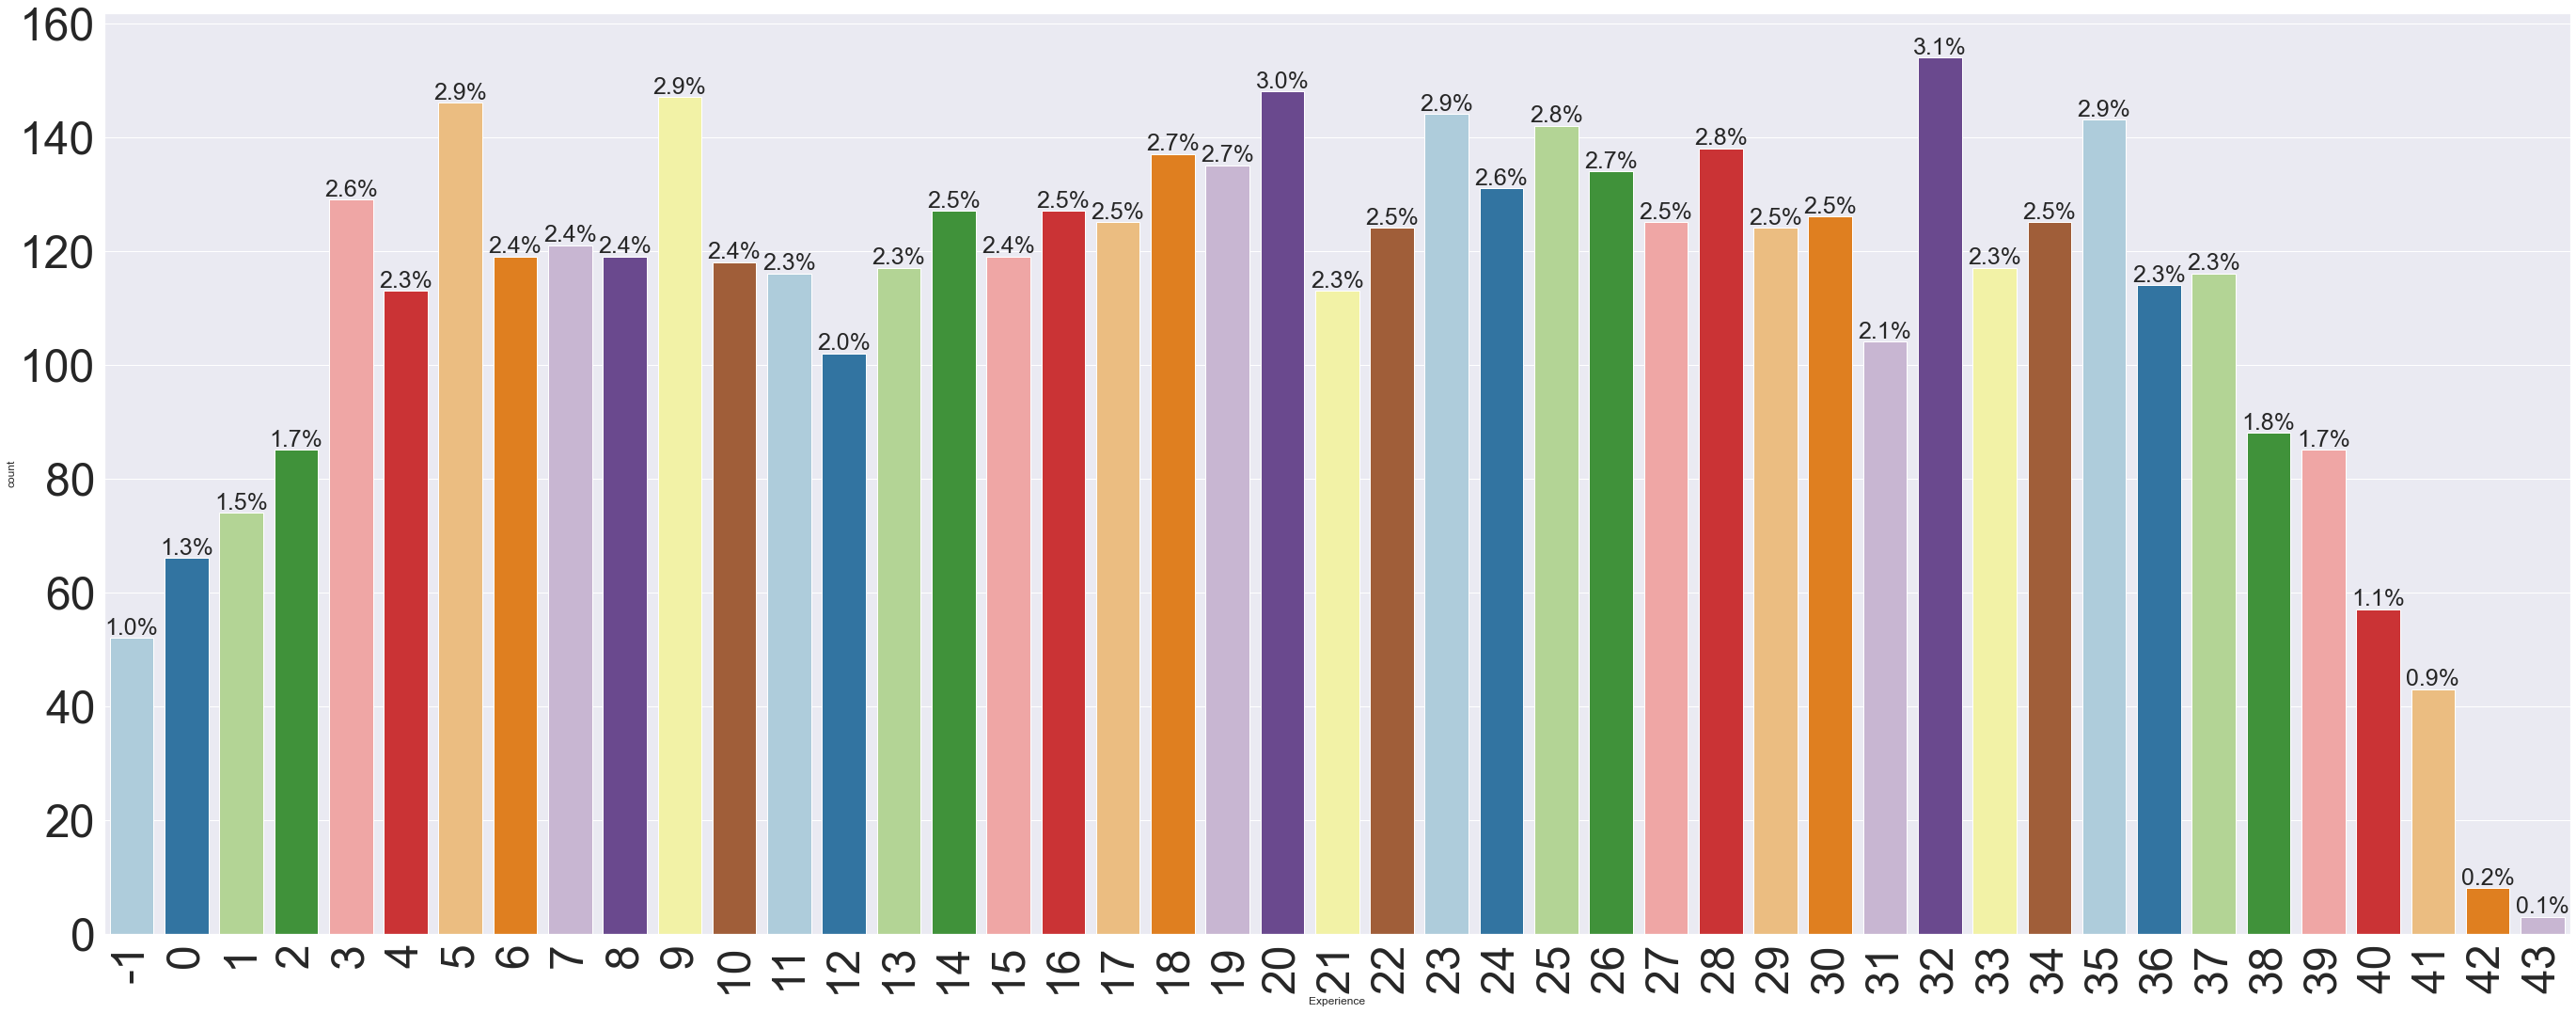

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(data, "Experience", perc=True)

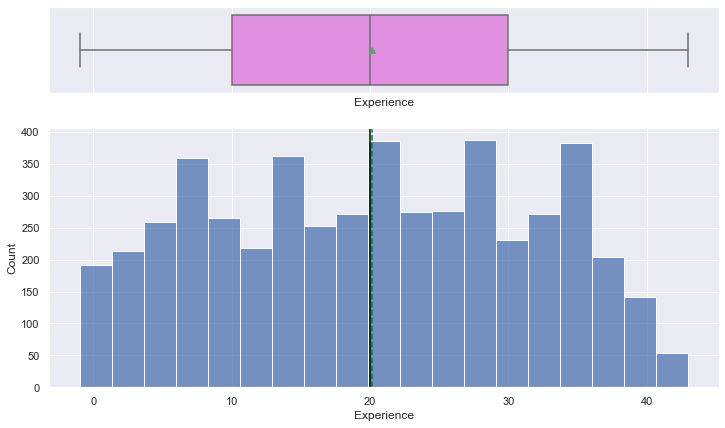

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Experience")

- Experience levels are distributed evenly from 0 to 38 years
- The IQR is between 10 and 30 years of Experience with a mean of 20.1
- There is no outliers in Experience

#### Observation on Income (in thousand dollars)

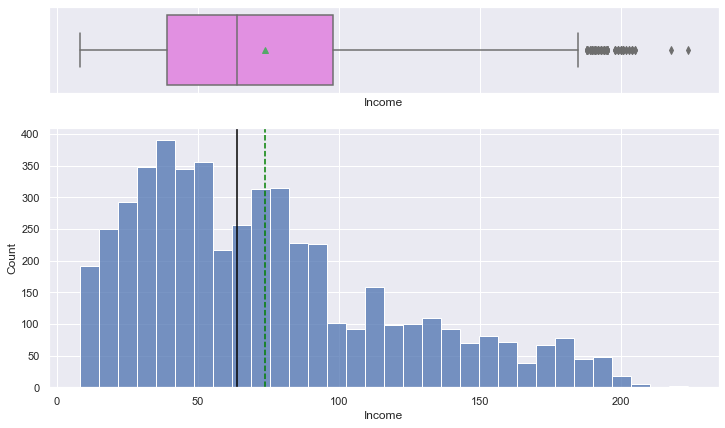

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Income")

- The Histogram shows Income is right skewed
- The IQR is between 39,000 and 98,000 Annual Income with a mean of 73,800
- There is some outliers with Income of 175,000 or more

#### Observation on ZipCode (by County)

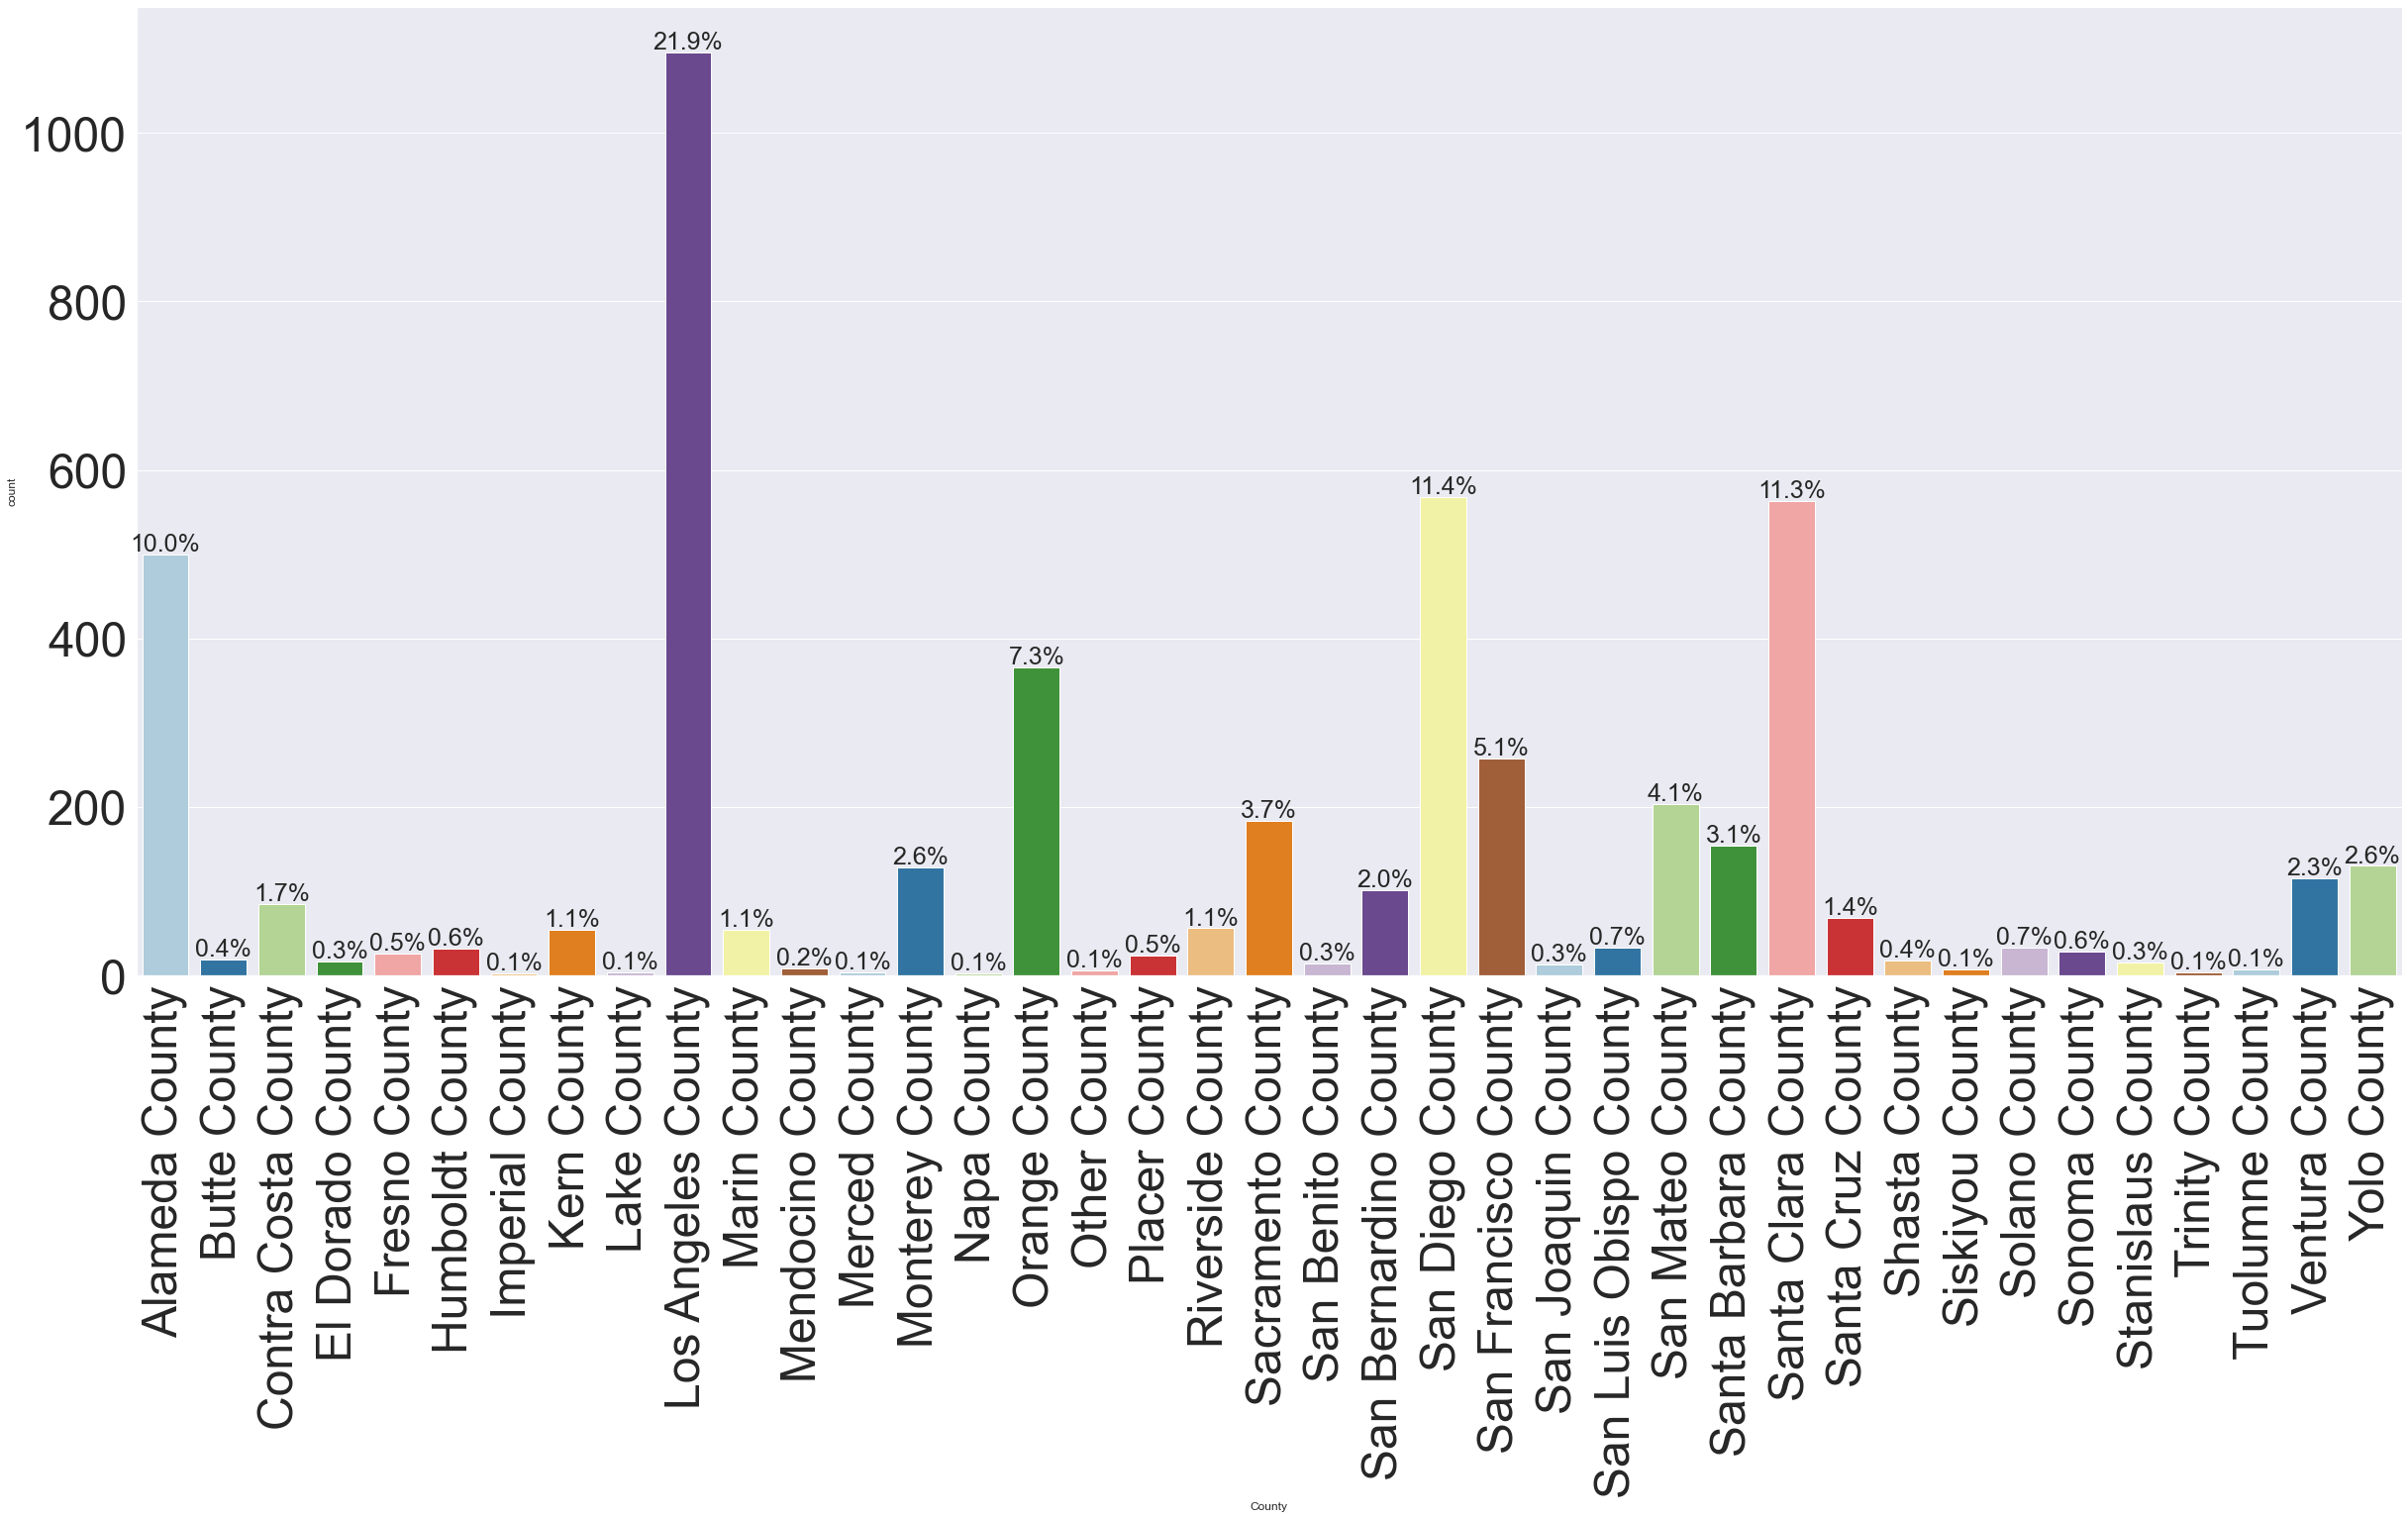

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(data, "County", perc=True)

- 21.9% of AllLife Bank customers are from Los Angeles County
- 11.4% of AllLife Bank customers are from San Diego County
- 11.3% of AllLife Bank customers are from Santa Clara County
- 10.0% of AllLife Bank customers are from Alameda County

#### Observation on Family size

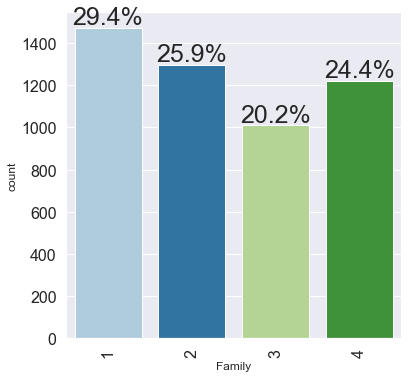

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "Family", figuresize=1, perc=True)

- 29.4% of AllLife Banks customers are single or lives alone
- 25.9% of AllLife Banks customers have a family size of two
- 20.2% of AllLife Banks customers have a family size of three
- 24.4% of AllLife Banks customers have a family size of four

#### Observation on Average spending on credit cards per month (in thousand dollars)

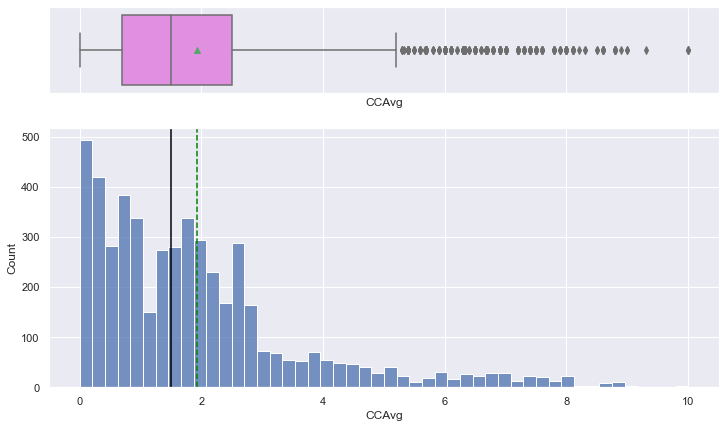

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "CCAvg")

- The Histogram shows Average spending on credit cards per month is right skewed
- The IQR is between 700 and 2,500 Average spending on credit cards per month with a mean of 1,900
- There is some outliers with spending on credit card per month of 5,200 or more

#### Observation on Education Level:  1-Undergrad    2-Graduate    3-Advanced/Professional

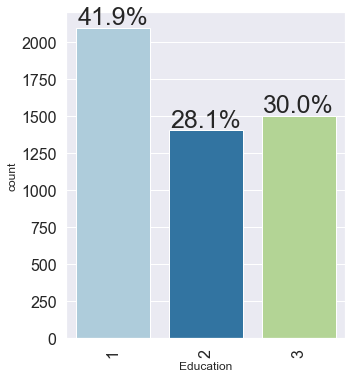

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "Education", figuresize=1, perc=True)

- 41.9% of customers are Undergrads
- 28.1% of customers are Graduates
- 30.0% of customers are Advanced/Professional

#### Observation on House Mortgage (in thousand dollars)

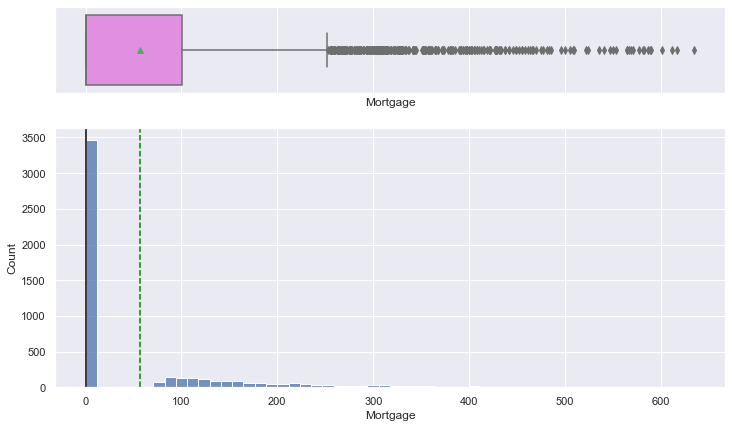

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "Mortgage")

- 3,450 of AllLife customers don't have a Mortgage
- Histogram shows Mortgage is right skewed
- The IQR is between 0 and 101,000 on Mortgage with a mean of 56,500
- There is some outliers for Mortgage of 250,000 or more

#### Observation on Personal Loan accepted from customers in the last campaign:  0-No  1-Yes

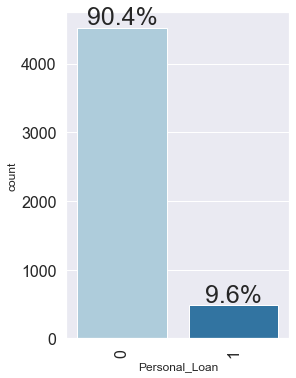

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "Personal_Loan", figuresize=1, perc=True)

- 90.4% of AllLife Bank customers did not accept the Personal Loan in the last campaign
- 9.6% of AllLife Bank customers did accept the Personal Loan in the last campaign

#### Observation on securities account with bank:  0-No   1-Yes

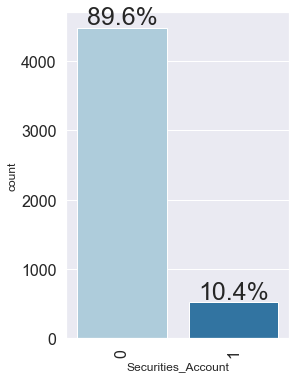

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "Securities_Account", figuresize=1, perc=True)

- 89.6% of AllLife Bank customers do not have Securities Account with the bank
- 10.4% of AllLife Bank customers do have Securities Account with the bank

#### Observation on customers with certificate of deposit (CD) with bank:  0-No   1-Yes

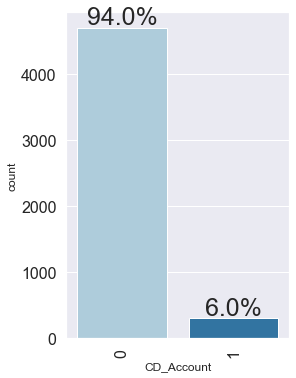

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "CD_Account", figuresize=1, perc=True)

- 94.0% of AllLife Bank customers do not have certificate of deposit (CD) Account with the bank
- 6.0% of AllLife Bank customers do have certificate of deposit (CD) Account with the bank

#### Observation on customers using Internet banking:  0-No   1-Yes

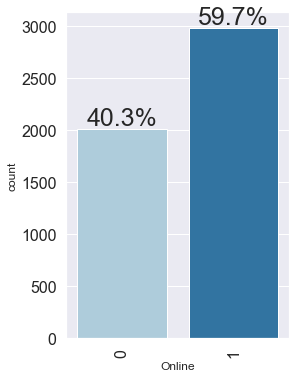

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "Online", figuresize=1, perc=True)

- 40.3% of AllLife Bank customers do not use Internet banking with the bank
- 59.7% of AllLife Bank customers do use Internet banking with the bank

#### Observation on customers having credit cards by any other bank:  0-No   1-Yes

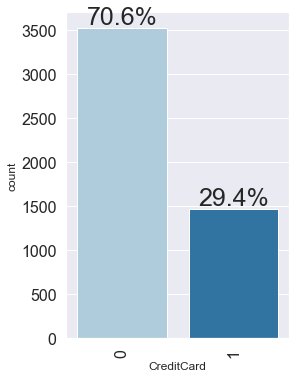

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "CreditCard", figuresize=1, perc=True)

- 70.6% of AllLife Bank customers do not have credit cards with other banks
- 29.4% of AllLife Bank customers do have credit cards with other banks

### Bivariate Analysis

In [30]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target, figuresize=3):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, figuresize * 5))
    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", prop={"size": 30}, bbox_to_anchor=(1, 1))
    plt.show()


# function to plot boxplot chart
def boxplot_chart(data_chart, x_axis, y_axis, x_rotation=0, figuresize=12):
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=data_chart, x=x_axis, y=y_axis, palette="PuBu")
    plt.xticks(rotation=x_rotation, fontsize=figuresize)
    plt.show()


# function to plot stripplot chart
def stripplot_chart(data_chart, x_axis, y_axis, hue_chart):
    plt.figure(figsize=(40, 20))
    sns.stripplot(data=data_chart, x=x_axis, y=y_axis, hue=hue_chart, jitter=True)
    plt.xticks(rotation=90, fontsize=50)
    plt.yticks(fontsize=40)
    plt.ylabel(y_axis, fontsize=50)
    plt.legend(loc="upper left", prop={"size": 20}, bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

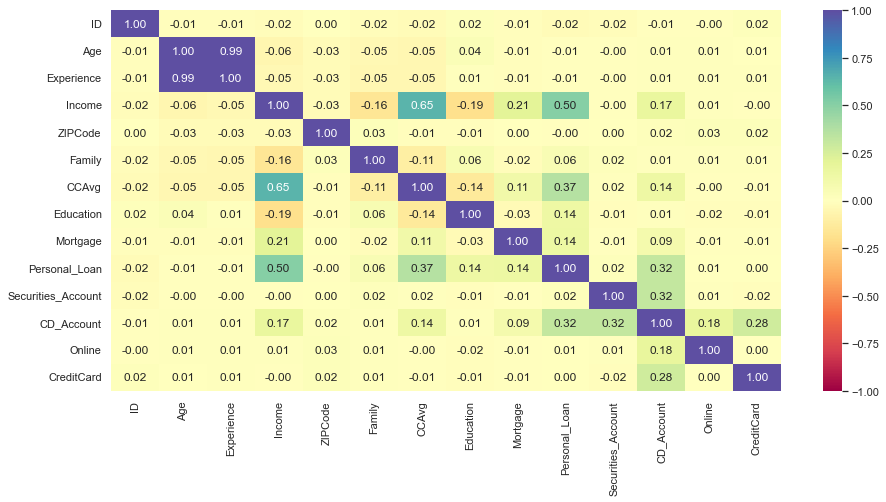

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is a strong positive correlation between Age and Experience
- There is a positive correlation between Income and CCAvg
- There is a positive correlation between Income and Personal_Loan
- There is a small positive correlation between CCAvg and Personal_Loan
- There is a small positive correlation between CD_Account and Personal_Loan
- There is a small positive correlation between CD_Account and Securities_Account

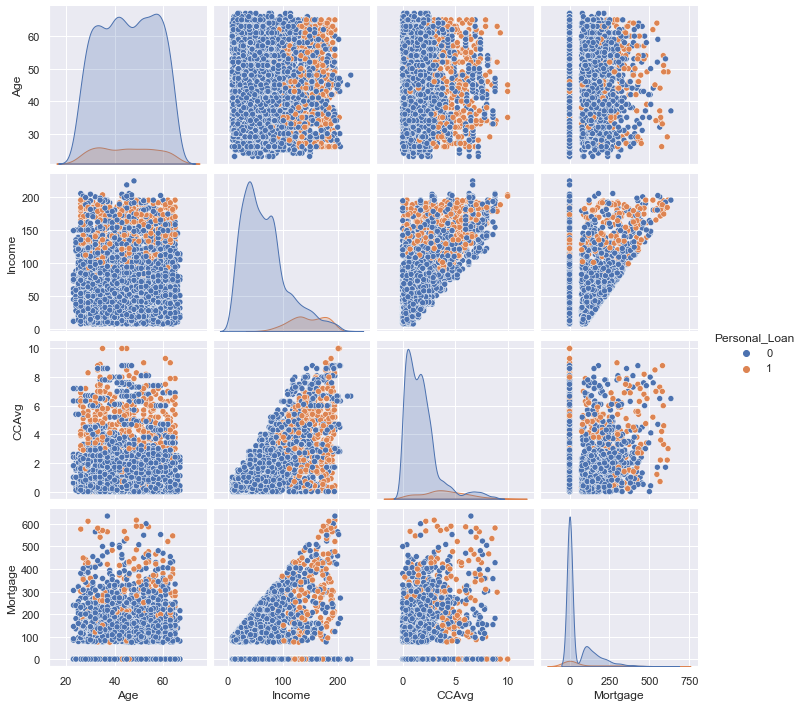

<IPython.core.display.Javascript object>

In [32]:
sns.pairplot(
    data=data.drop(
        [
            "ZIPCode",
            "ID",
            "Online",
            "CreditCard",
            "Experience",
            "CD_Account",
            "Family",
            "Education",
            "Securities_Account",
        ],
        axis=1,
    ),
    hue="Personal_Loan",
    diag_kind="kde",
)
plt.show()

- There is a correlation between Income and Mortgage costs
- There is a correlation between Income and CCAvg spending per month
- Customers with large Mortgage also get a Personal Loan
- Customers with large CCAvg also get a Personal Loan

Personal_Loan              0    1   All
County                                 
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            333   33   366
San Francisco County     238   19   257
Monterey County          113   15   128
Sacramento County        169   15   184
San Mateo County         192   12   204
Contra Costa County       73   12    85
Santa Barbara County     143   11   154
Ventura County           104   11   115
Yolo County              122    8   130
Santa Cruz County         60    8    68
Kern County               47    7    54
Marin County              48    6    54
Sonoma County             22    6    28
Riverside County          50    6    56
San Luis Obispo County    28    5    33
Shasta County             15    3    18
Solano County             30    3    33
San Bernardino County     98    3   101


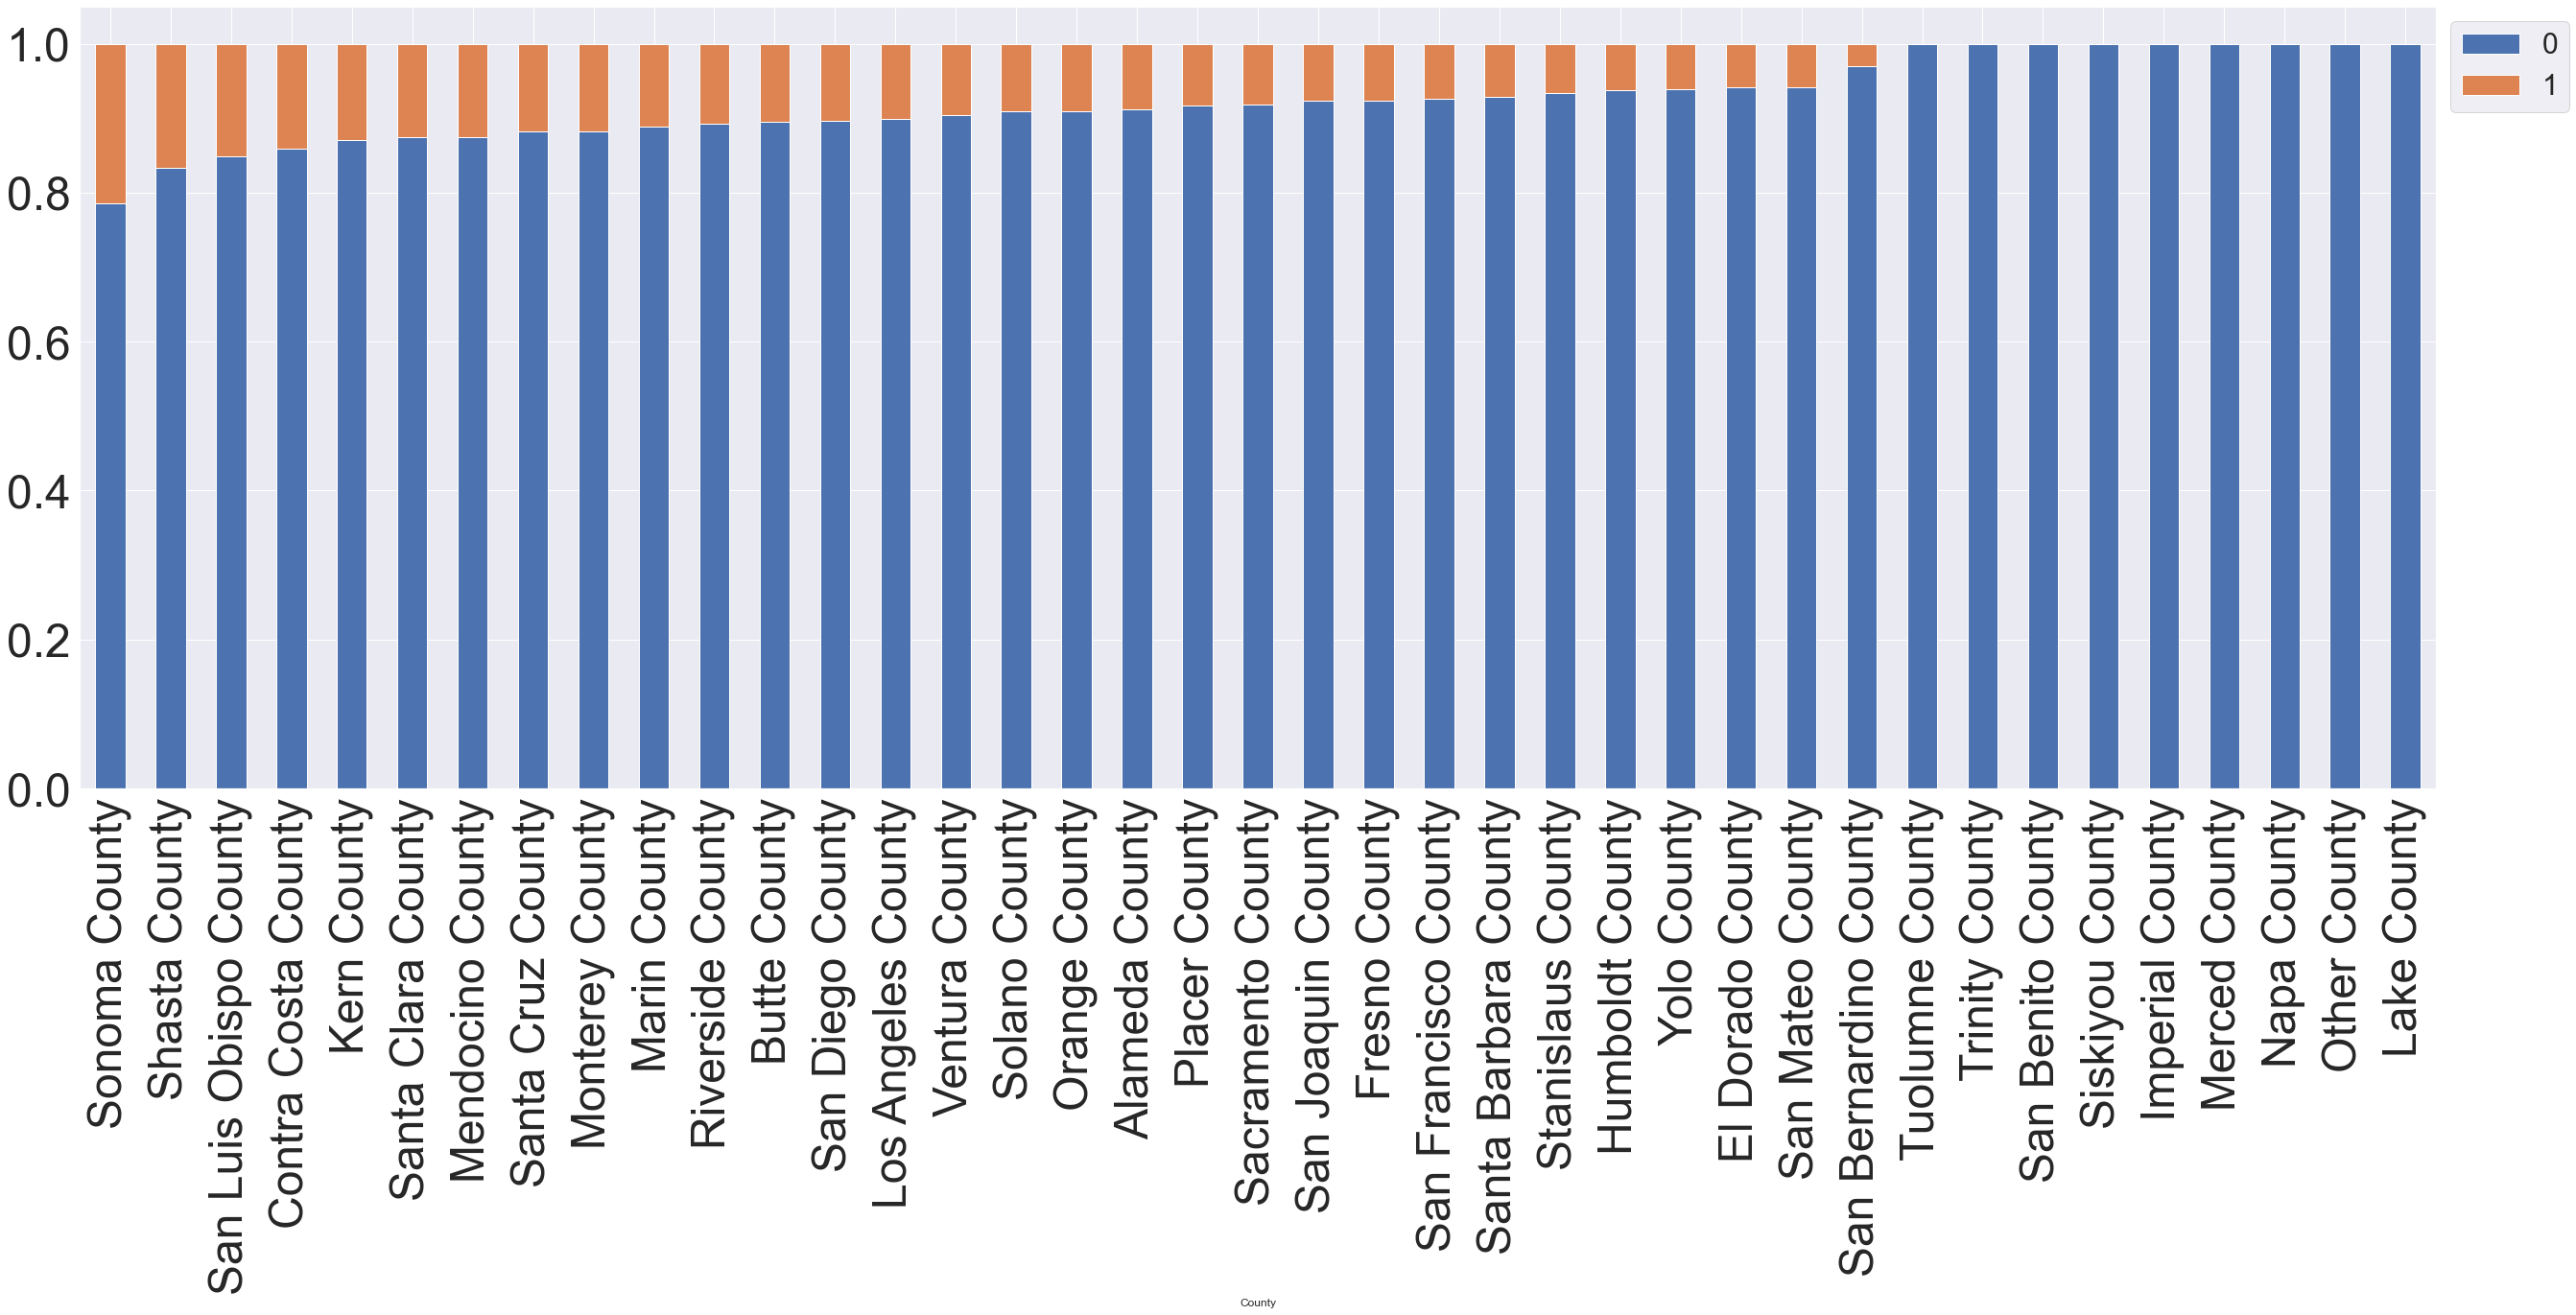

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(data, "County", "Personal_Loan")

- Los Angeles County has 111 customers with Personal Loans more than any other County
- Sonoma County has 6 customers with Personal Loans with the largest percentage (21.4% have a Personal Loan) by County

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


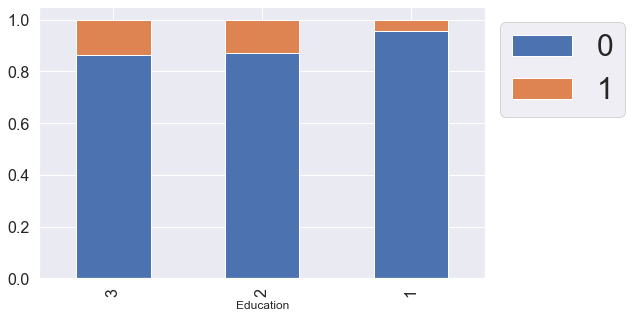

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(data, "Education", "Personal_Loan", figuresize=1)

- Education Level of Graduates and Advanced/Professional are more likely to take out a Personal Loan over Undergrads

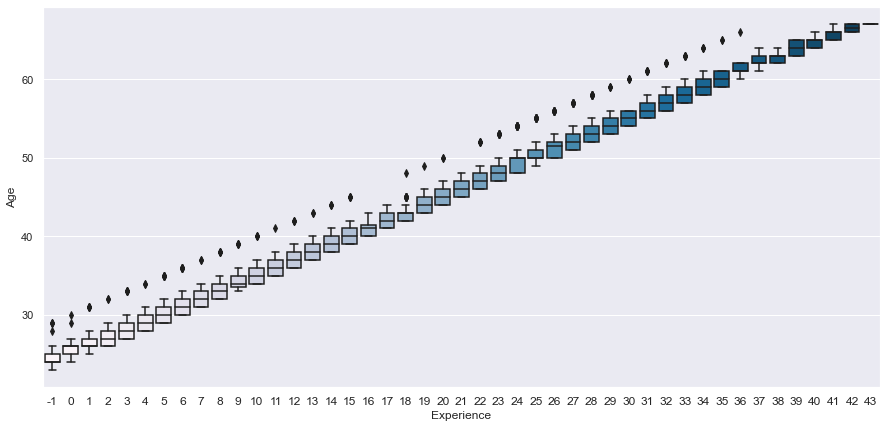

<IPython.core.display.Javascript object>

In [35]:
boxplot_chart(data, data["Experience"], data["Age"])

- An increase in a persons age also have increase in professional experience

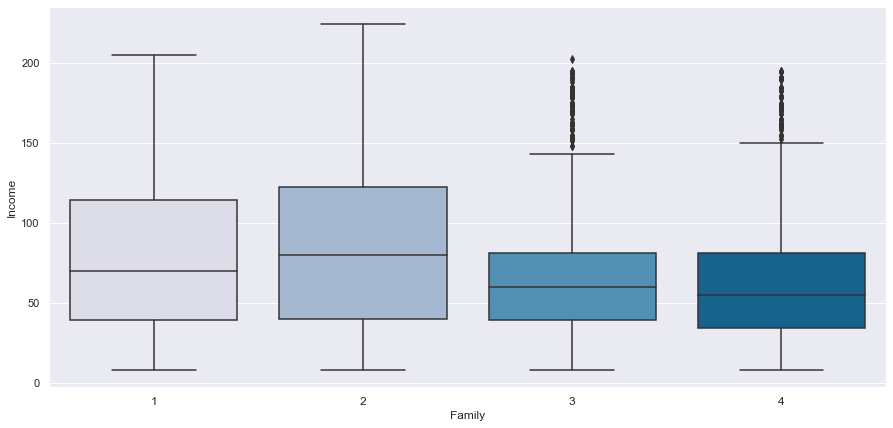

<IPython.core.display.Javascript object>

In [36]:
boxplot_chart(data, data["Family"], data["Income"])

- Family size of two has the largest Income followed by Family size of one
- Family size of three or more earn less Income annually

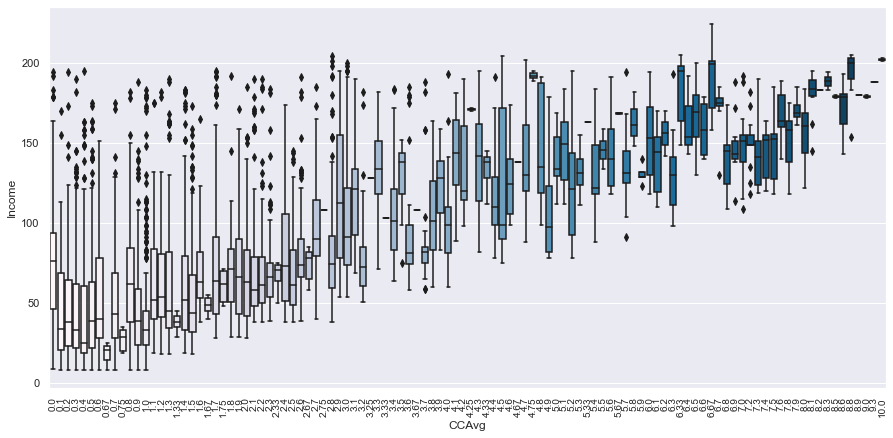

<IPython.core.display.Javascript object>

In [37]:
boxplot_chart(data, data["CCAvg"], data["Income"], 90, 10)

- Higher Income will have more spending on credit cards per month than lower Income

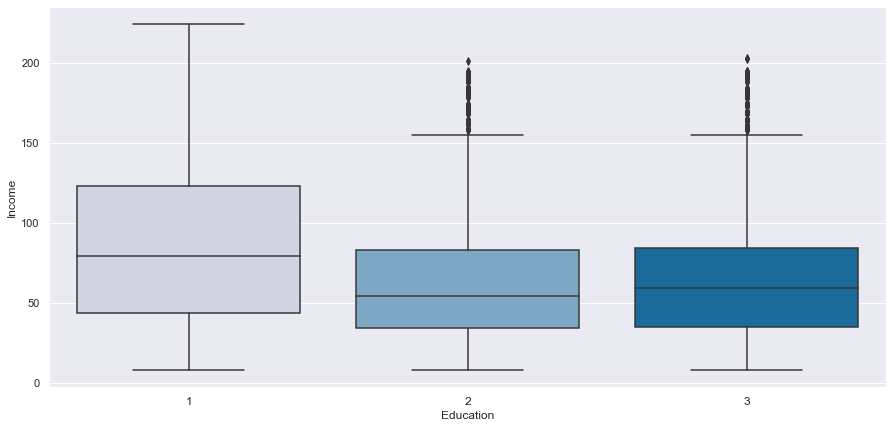

<IPython.core.display.Javascript object>

In [38]:
boxplot_chart(data, data["Education"], data["Income"])

- Undergrads earn more on average in this dataset than both Graduate and Advanced/Professional

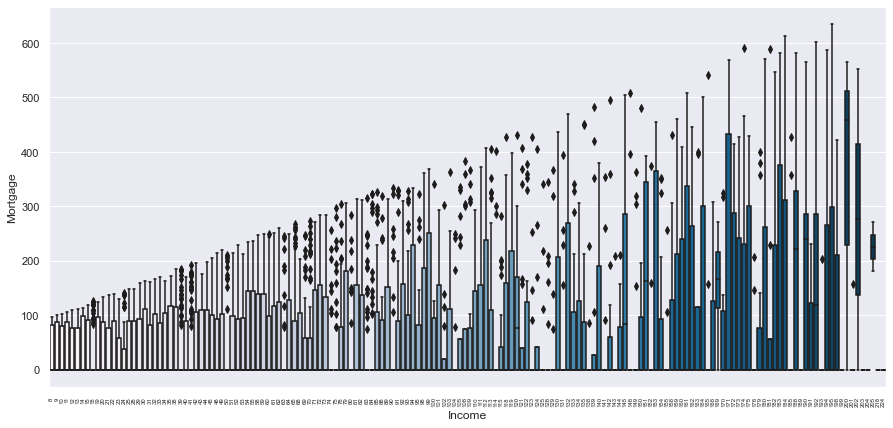

<IPython.core.display.Javascript object>

In [39]:
boxplot_chart(data, data["Income"], data["Mortgage"], 90, 6)

- Higher the Income the chances of have a higher Mortgage goes up

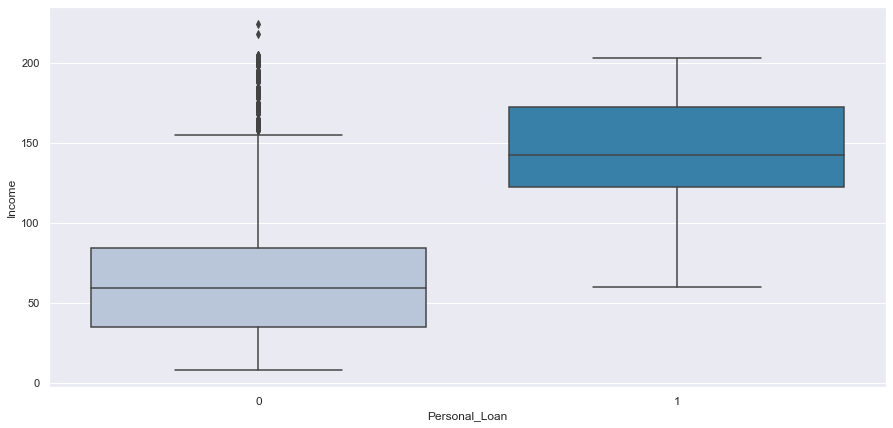

<IPython.core.display.Javascript object>

In [40]:
boxplot_chart(data, data["Personal_Loan"], data["Income"])

- Higher the Income the chances of the individual get a Personal Loan goes up

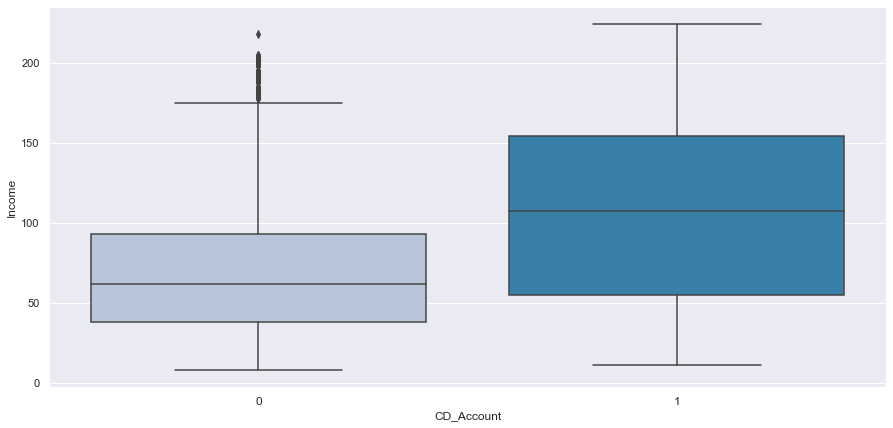

<IPython.core.display.Javascript object>

In [41]:
boxplot_chart(data, data["CD_Account"], data["Income"])

- Higher the Income the chances of the individual having a CD_Account goes up

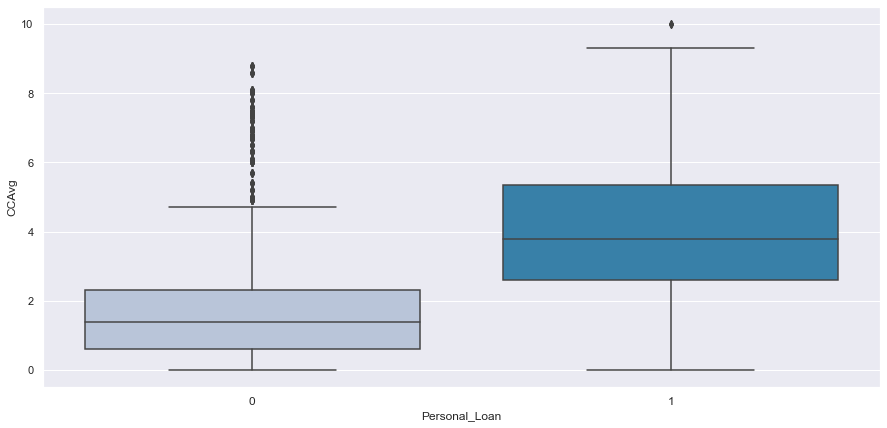

<IPython.core.display.Javascript object>

In [42]:
boxplot_chart(data, data["Personal_Loan"], data["CCAvg"])

- The higher the Average spending on credit cards per month the chances of the individual having a Personal Loan goes up

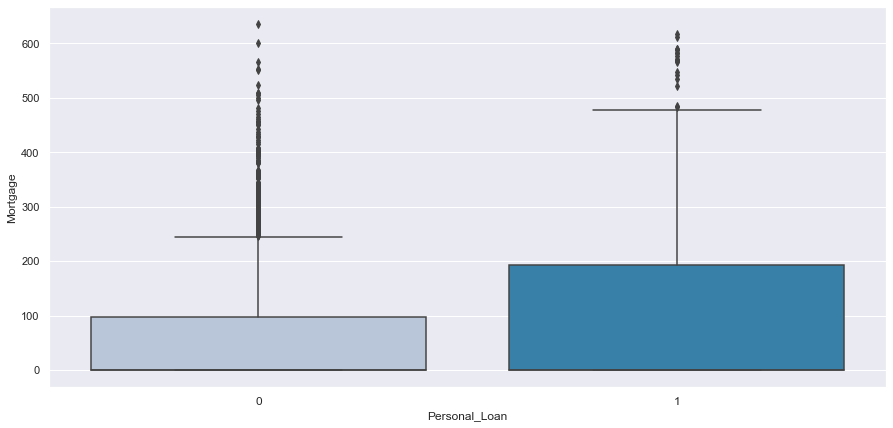

<IPython.core.display.Javascript object>

In [43]:
boxplot_chart(data, data["Personal_Loan"], data["Mortgage"])

- The higher the Mortgage the chances of the individual get a Personal Loan goes up

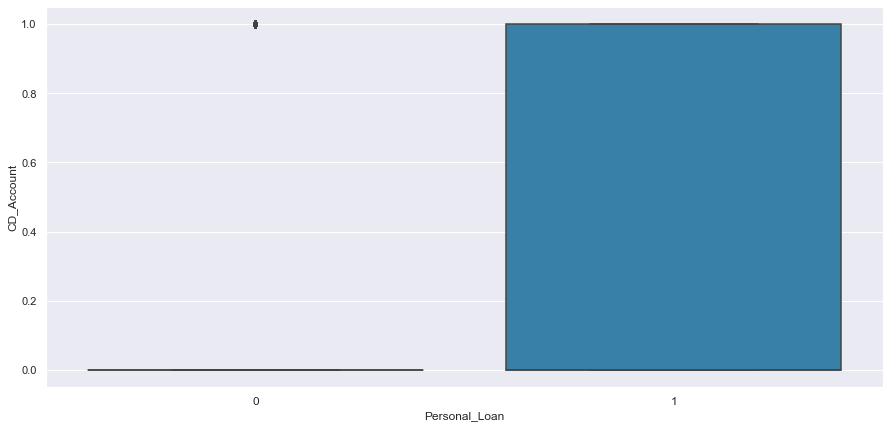

<IPython.core.display.Javascript object>

In [44]:
boxplot_chart(data, data["Personal_Loan"], data["CD_Account"])

- If the person has a CD Account with the bank the chances of the individual get a Personal Loan goes up

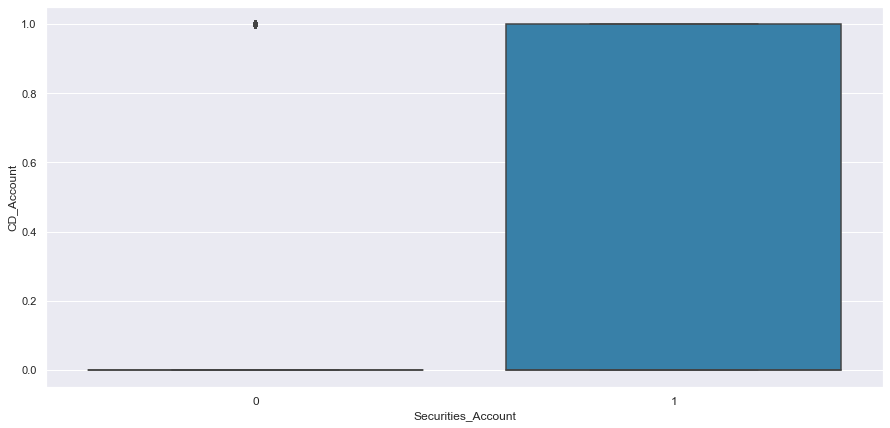

<IPython.core.display.Javascript object>

In [45]:
boxplot_chart(data, data["Securities_Account"], data["CD_Account"])

- If the person has Securities Account with the bank the chances of the individual having a CD Account with the bank goes up

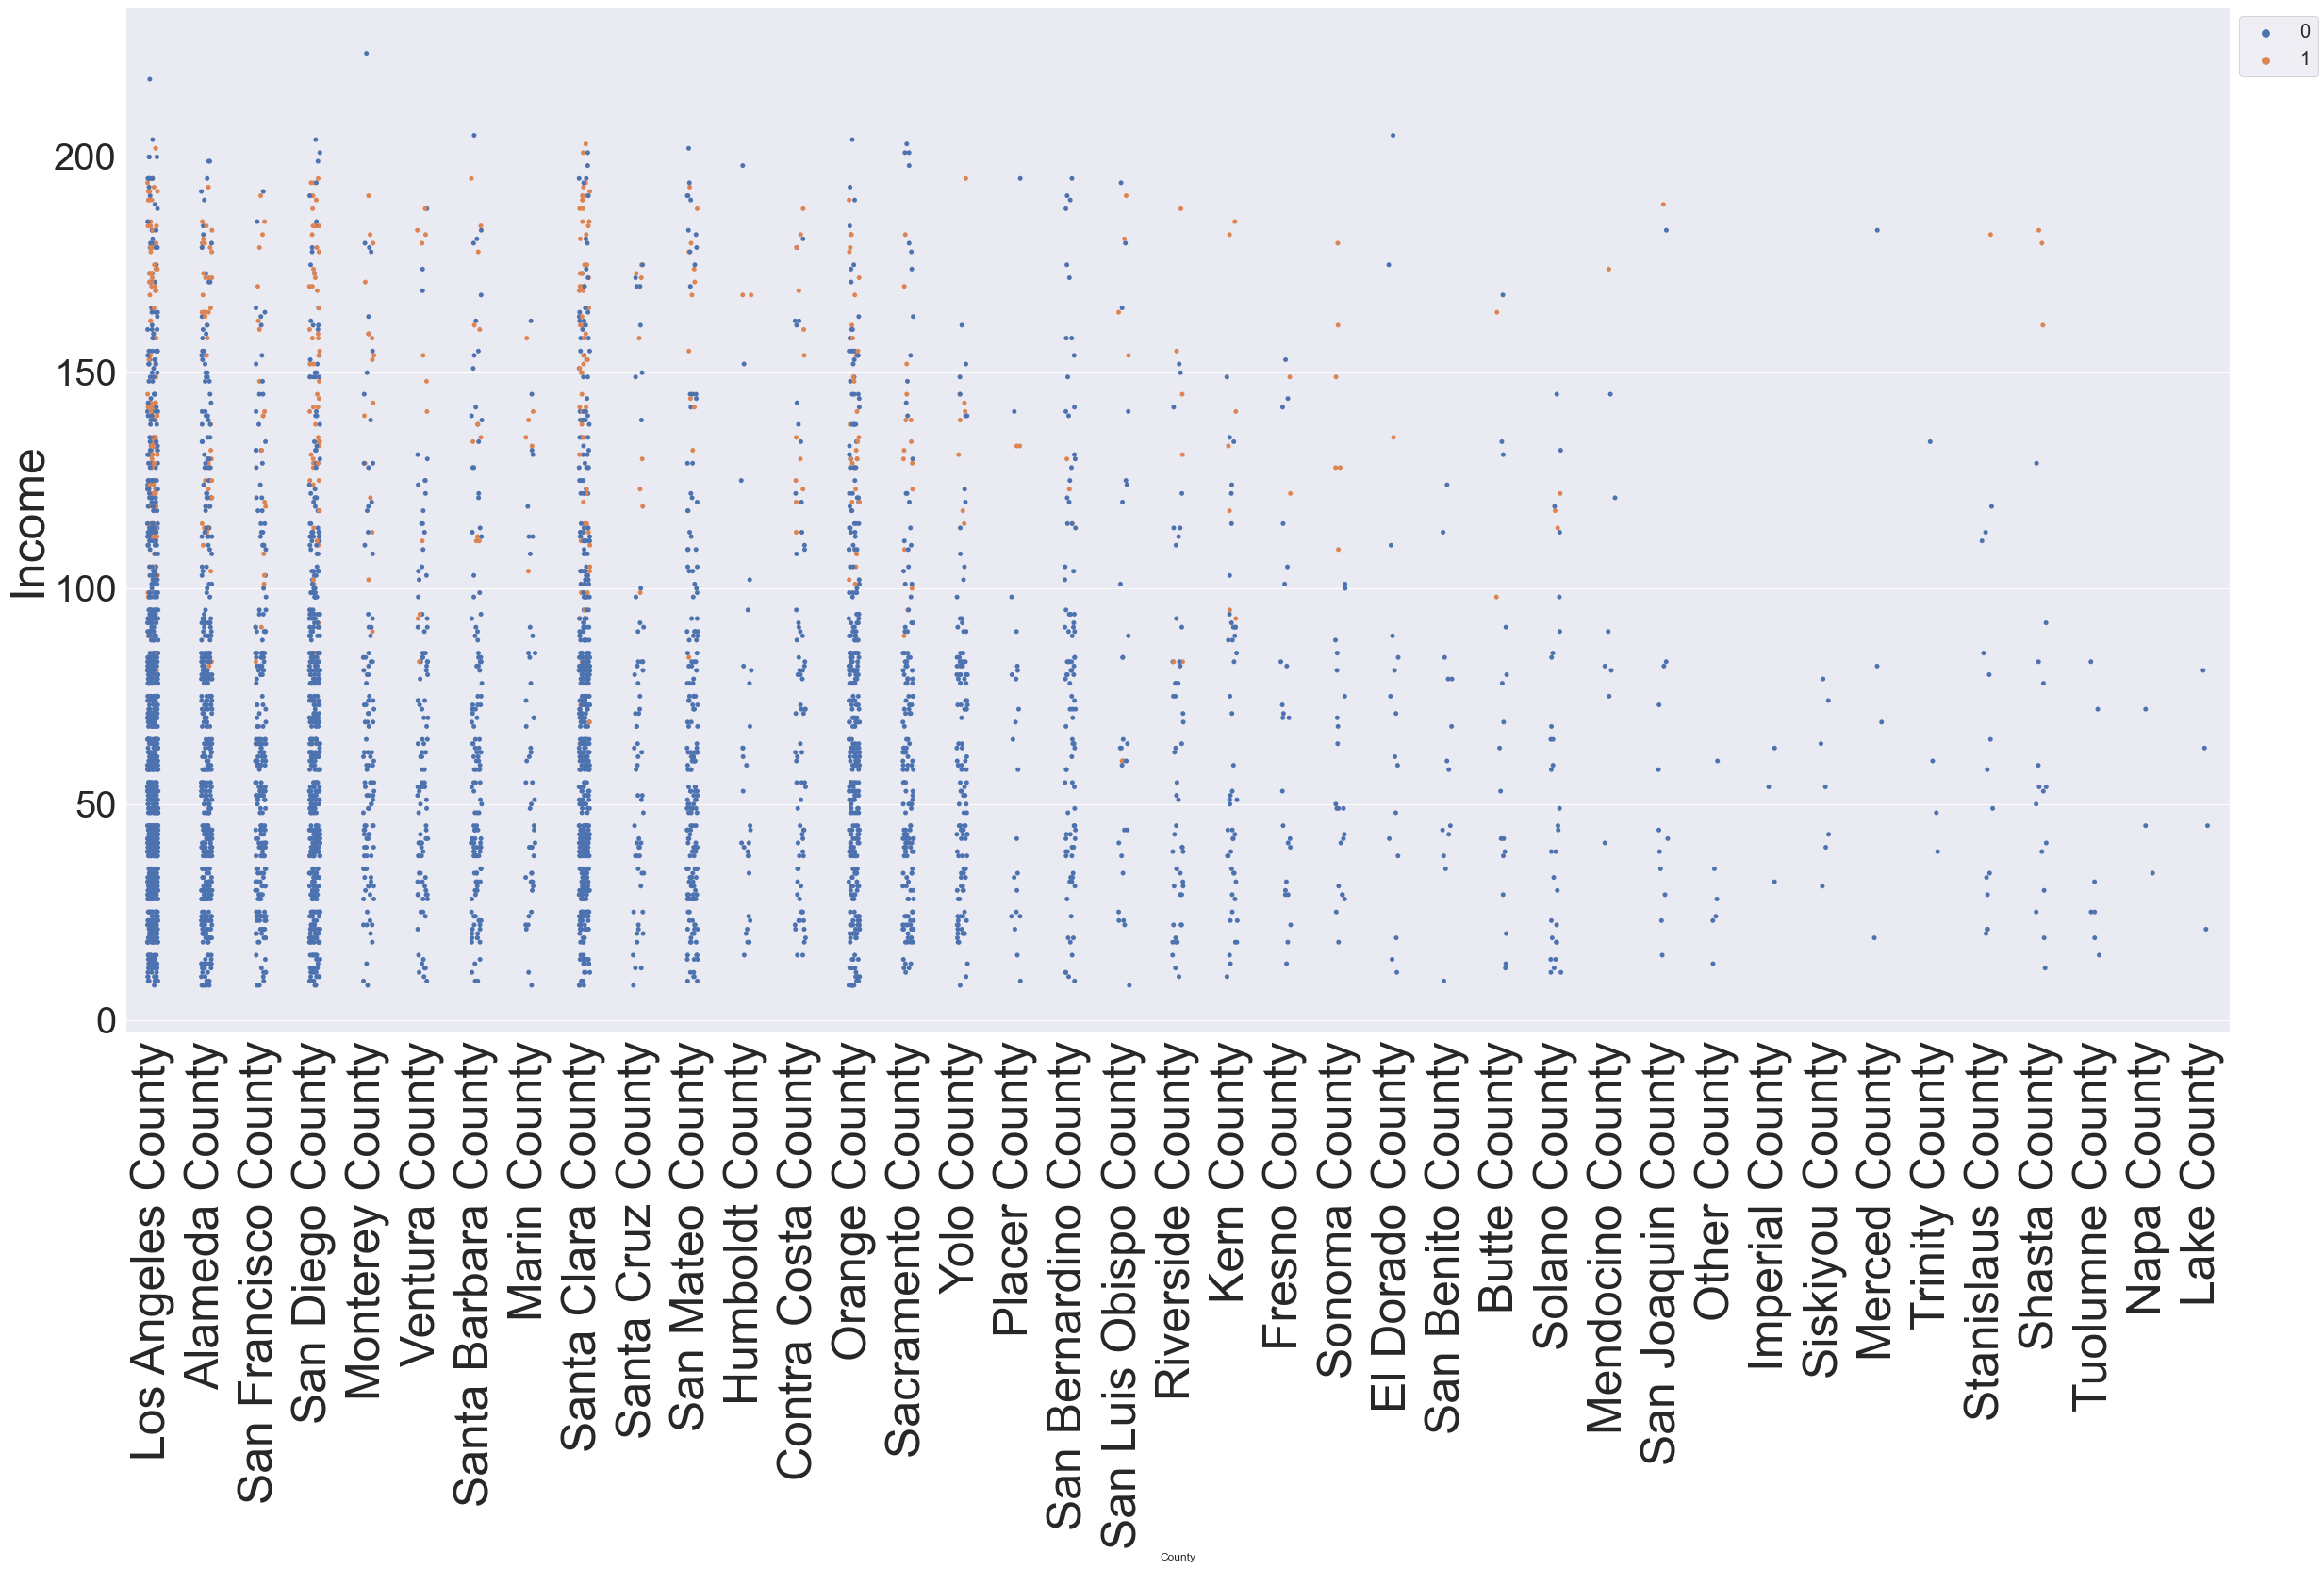

<IPython.core.display.Javascript object>

In [46]:
stripplot_chart(data, "County", "Income", "Personal_Loan")

- There are a few areas in California that have a lower Income than other areas of California
- Higher the Income the chances of have a Personal Loan goes up as well
- Imperial County and Other County have the lowest Incomes

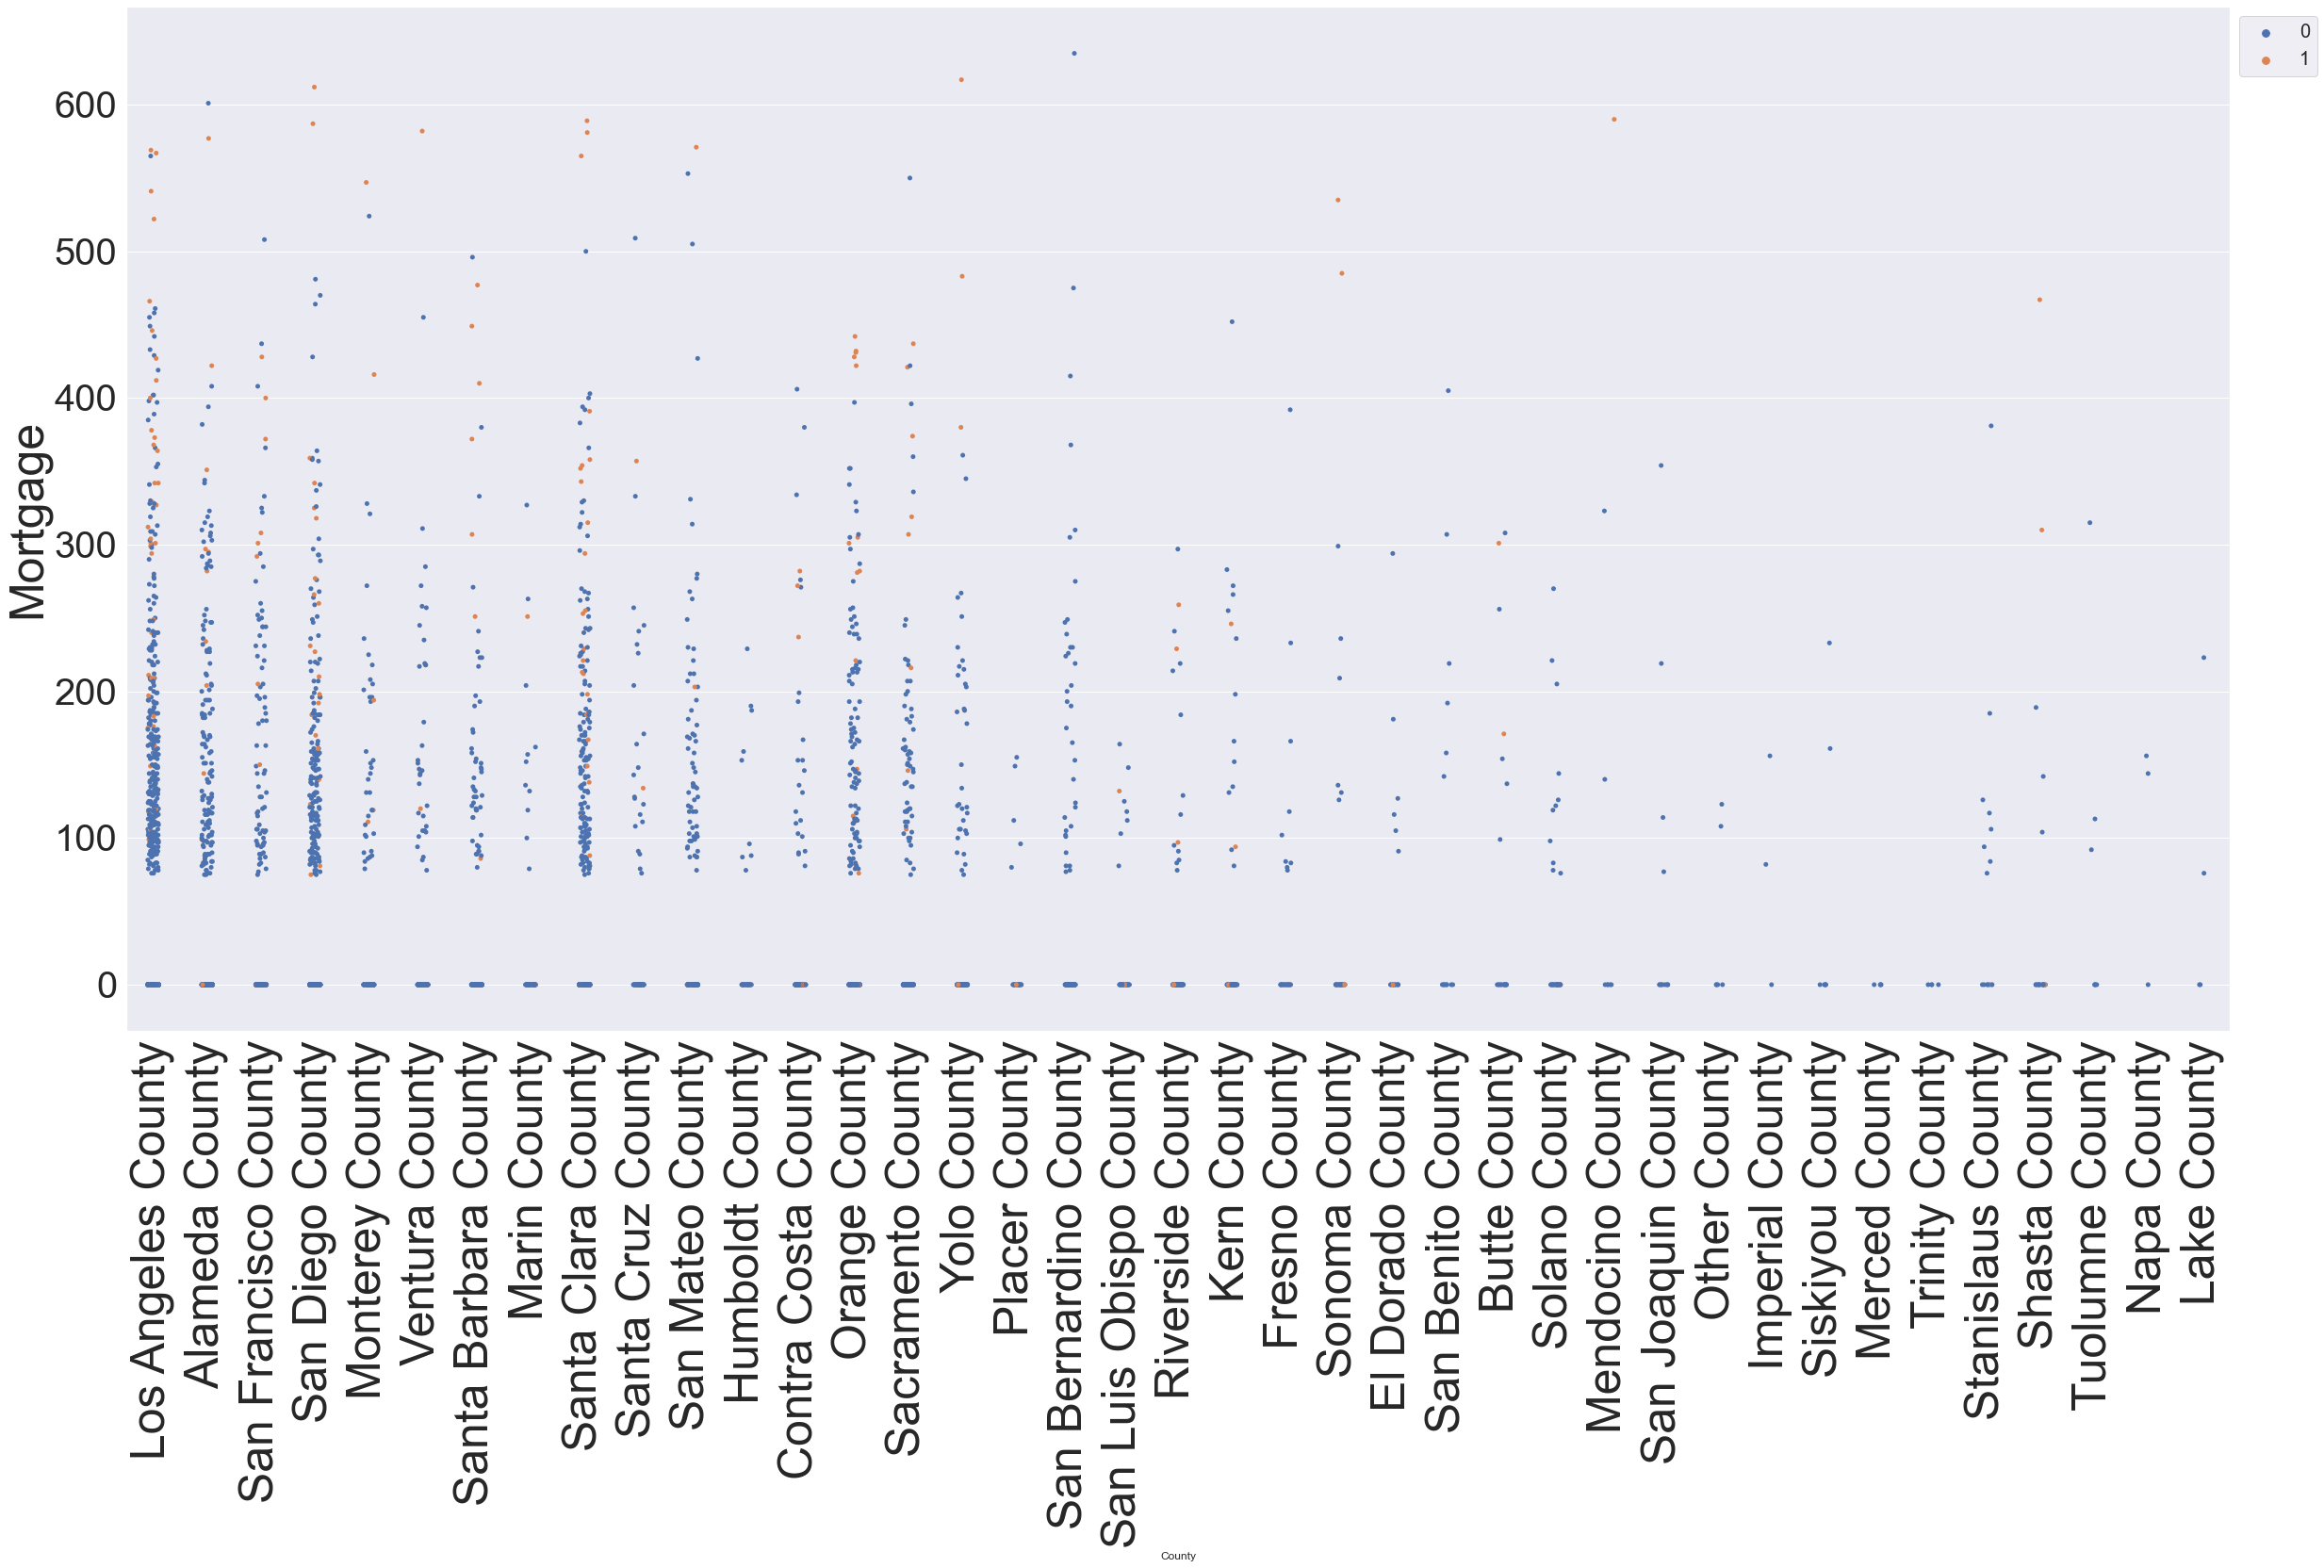

<IPython.core.display.Javascript object>

In [47]:
stripplot_chart(data, "County", "Mortgage", "Personal_Loan")

- There are a few areas in California that have a lower Mortgage than other areas of California
- The higher the Mortgage the chances of taking a Personal Loan goes up
- Merced County and Trinity County do not have any Mortgages

### Key observations on the relationship between variables:

- The lowest age is 23 and the largest age is 67
- Age groups are distributed evenly from age 28-63
- The IQR is between age 35 and 55 with a mean of 45.3
- There is no outliers in age
- Experience levels are distributed evenly from 0 to 38 years
- The IQR is between 10 and 30 years of Experience with a mean of 20.1
- There is no outliers in Experience
- The Histogram shows Income is right skewed
- The IQR is between 39,000 and 98,000 Annual Income with a mean of 73,800
- There is some outliers with Income of 175,000 or more
- 21.9% of AllLife Bank customers are from Los Angeles County
- 11.4% of AllLife Bank customers are from San Diego County
- 11.3% of AllLife Bank customers are from Santa Clara County
- 10.0% of AllLife Bank customers are from Alameda County
- 29.4% of AllLife Banks customers are single or lives alone
- 25.9% of AllLife Banks customers have a family size of two
- 20.2% of AllLife Banks customers have a family size of three
- 24.4% of AllLife Banks customers have a family size of four
- The Histogram shows Average spending on credit cards per month is right skewed
- The IQR is between 700 and 2,500 Average spending on credit cards per month with a mean of 1,900
- There is some outliers with spending on credit card per month of 5,200 or more
- 41.9% of customers are Undergrads
- 28.1% of customers are Graduates
- 30.0% of customers are Advanced/Professional
- 3,450 of AllLife customers don't have a Mortgage
- Histogram shows Mortgage is right skewed
- The IQR is between 0 and 101,000 on Mortgage with a mean of 56,500
- There is some outliers for Mortgage of 250,000 or more
- 90.4% of AllLife Bank customers did not accept the Personal Loan in the last campaign
- 9.6% of AllLife Bank customers did accept the Personal Loan in the last campaign
- 89.6% of AllLife Bank customers do not have Securities Account with the bank
- 10.4% of AllLife Bank customers do have Securities Account with the bank
- 94.0% of AllLife Bank customers do not have certificate of deposit (CD) Account with the bank
- 6.0% of AllLife Bank customers do have certificate of deposit (CD) Account with the bank
- 40.3% of AllLife Bank customers do not use Internet banking with the bank
- 59.7% of AllLife Bank customers do use Internet banking with the bank
- 70.6% of AllLife Bank customers do not have credit cards with other banks
- 29.4% of AllLife Bank customers do have credit cards with other banks
- There is a strong positive correlation between Age and Experience
- There is a positive correlation between Income and CCAvg
- There is a positive correlation between Income and Personal_Loan
- There is a small positive correlation between CCAvg and Personal_Loan
- There is a small positive correlation between CD_Account and Personal_Loan
- There is a small positive correlation between CD_Account and Securities_Account
- There is a correlation between Income and Mortgage costs
- There is a correlation between Income and CCAvg spending per month
- Customers with large Mortgage also get a Personal Loan
- Customers with large CCAvg also get a Personal Loan
- Los Angeles County has 111 customers with Personal Loans more than any other County
- Sonoma County has 6 customers with Personal Loans with the largest percentage (21.4% have a Personal Loan) by County
- Education Level of Graduates and Advanced/Professional are more likely to take out a Personal Loan over Undergrads
- An increase in a persons age also have increase in professional experience
- Family size of two has the largest Income followed by Family size of one
- Family size of three or more earn less Income annually
- Higher Income will have more spending on credit cards per month than lower Income
- Undergrads earn more on average in this dataset than both Graduate and Advanced/Professional
- Higher the Income the chances of have a higher Mortgage goes up
- Higher the Income the chances of the individual get a Personal Loan goes up
- Higher the Income the chances of the individual having a CD_Account goes up
- The higher the Average spending on credit cards per month the chances of the individual having a Personal Loan goes up
- The higher the Mortgage the chances of the individual get a Personal Loan goes up
- If the person has a CD Account with the bank the chances of the individual get a Personal Loan goes up
- If the person has Securities Account with the bank the chances of the individual having a CD Account with the bank goes up
- There are a few areas in California that have a lower Income than other areas of California
- Higher the Income the chances of have a Personal Loan goes up as well
- Imperial County and Other County have the lowest Incomes
- There are a few areas in California that have a lower Mortgage than other areas of California
- The higher the Mortgage the chances of taking a Personal Loan goes up
- Merced County and Trinity County do not have any Mortgages

## Data Pre-processing

In [48]:
# Create a copy of data and call it "df"
df = data.copy()

<IPython.core.display.Javascript object>

In [49]:
# Create dummies for the County column in the dataset
df = pd.get_dummies(df, columns=["County"], drop_first=True)

<IPython.core.display.Javascript object>

In [50]:
# Drop "ID" and "ZIPCode" Columns from dataset
df.drop(["ID", "ZIPCode"], axis=1, inplace=True)
df.head(10)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   
5   37          13      29       4    0.4          2       155              0   
6   53          27      72       2    1.5          2         0              0   
7   50          24      22       1    0.3          3         0              0   
8   35          10      81       3    0.6          2       104              0   
9   34           9     180       1    8.9          3         0              1   

   Securities_Account  CD_Account  Online  CreditCard  County_Butte County  \
0                   1           0       0           0                    0   
1                   1           0       0           0                    0   
2                   0           0       0           0                    0   
3                   0           0       0           0                    0   
4                   0           0       0           1                    0   
5                   0           0       1           0                    0   
6                   0           0       1           0                    0   
7                   0           0       0           1                    0   
8                   0           0       1           0                    0   
9                   0           0       0           0                    0   

   County_Contra Costa County  County_El Dorado County  County_Fresno County  \
0                           0                        0                     0   
1                           0                        0                     0   
2                           0                        0                     0   
3                           0                        0                     0   
4                           0                        0                     0   
5                           0                        0                     0   
6                           0                        0                     0   
7                           0                        0                     0   
8                           0                        0                     0   
9                           0                        0                     0   

   County_Humboldt County  County_Imperial County  County_Kern County  \
0                       0                       0                   0   
1                       0                       0                   0   
2                       0                       0                   0   
3                       0                       0                   0   
4                       0                       0                   0   
5                       0                       0                   0   
6                       0                       0                   0   
7                       0                       0                   0   
8                       0                       0                   0   
9                       0                       0                   0   

   County_Lake County  County_Los Angeles County  County_Marin County  \
0                   0                          1                    0   
1                   0                          1                    0   
2                   0                          0                    0   
3                   0                          0                    0   
4                   0                          1                    0   
5                   0                          0                    0   
6                   0                          1        

<IPython.core.display.Javascript object>

In [51]:
# Information on new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   int64  
 1   Experience                     5000 non-null   int64  
 2   Income                         5000 non-null   int64  
 3   Family                         5000 non-null   int64  
 4   CCAvg                          5000 non-null   float64
 5   Education                      5000 non-null   int64  
 6   Mortgage                       5000 non-null   int64  
 7   Personal_Loan                  5000 non-null   int64  
 8   Securities_Account             5000 non-null   int64  
 9   CD_Account                     5000 non-null   int64  
 10  Online                         5000 non-null   int64  
 11  CreditCard                     5000 non-null   int64  
 12  County_Butte County            5000 non-null   u

<IPython.core.display.Javascript object>

## Split Data

In [52]:
# Split into X=Predictor and Y=Predicted
X = df.drop("Personal_Loan", axis=1)
Y = df["Personal_Loan"]

<IPython.core.display.Javascript object>

In [53]:
# 70% Training and 30% Testing split on dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [54]:
# Checking the Split on dataset
print("{0:0.1f}% data is in training set".format((len(x_train) / len(df.index)) * 100))
print("{0:0.1f}% data is in test set".format((len(x_test) / len(df.index)) * 100))

70.0% data is in training set
30.0% data is in test set


<IPython.core.display.Javascript object>

## Logistic Regression Model

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [56]:
# Fit the model on train
model = LogisticRegression(solver="newton-cg", random_state=1)
model.fit(x_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

In [57]:
# predict on test
y_predict = model.predict(x_test)

<IPython.core.display.Javascript object>

In [58]:
# model prediction accuracy score
model_score = model.score(x_test, y_test)
print(model_score)

0.9446666666666667


<IPython.core.display.Javascript object>

Confusion Matrix on Training


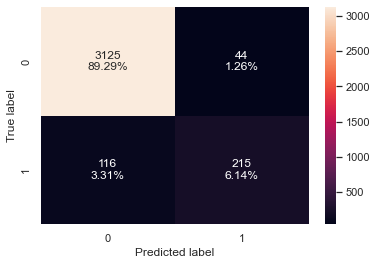

<IPython.core.display.Javascript object>

In [59]:
# Creating Heatmap of the confusion matrix
print("Confusion Matrix on Training")
confusion_matrix_sklearn_with_threshold(model, x_train, y_train)

Confusion Matrix on Test


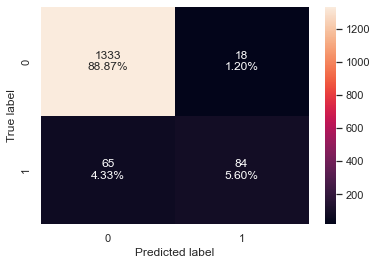

<IPython.core.display.Javascript object>

In [60]:
# Creating Heatmap of the confusion matrix
print("Confusion Matrix on Test")
confusion_matrix_sklearn_with_threshold(model, x_test, y_test)

The confusion matrix on Test:

True Positives (TP): We correctly predicted that the customer will purchase the loan: 84

True Negatives (TN): We correctly predicted that the customer will not purchase the loan: 1333

False Positives (FP): We incorrectly predicted that the customer will purchase the loan: 18 ("Type I error")

False Negatives (FN): We incorrectly predicted that the customer will not purchase the loan: 65 ("Type II error")

- <b>*We are most concerned with the False Negatives (FN) because we are trying to get target customers to purchase a loan.  We really don't want to be wrong here because that is our main goal is to find all the customers that would want a Personal Loan from the bank.  There was 4.33% that we did not predict would purchase a loan but did.*</b>
- <b>*We are going to optimized the models performance by looking at the Recall and Precision curves*</b>




## This is the current performance of our model right now:

In [61]:
# Show model performance training chart
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    model, x_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.954286  0.649547   0.830116  0.728814

<IPython.core.display.Javascript object>

In [62]:
# Show model performance test chart
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.944667  0.563758   0.823529  0.669323

<IPython.core.display.Javascript object>

- <b>*Accuracy is high but we are trying to get target customers to purchase a loan so we will optimize the performance*</b>

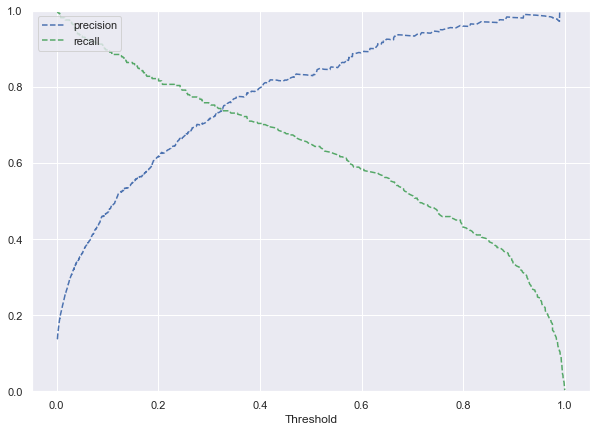

<IPython.core.display.Javascript object>

In [63]:
# Find the predicted probabilities for class 1
y_scores = model.predict_proba(x_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

## This is our Optimized Performance Model:

In [64]:
# setting the threshold
optimal_threshold_curve = 0.32

<IPython.core.display.Javascript object>

In [65]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    model, x_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.950286  0.743202   0.734328  0.738739

<IPython.core.display.Javascript object>

In [66]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy   Recall  Precision        F1
0     0.942  0.66443   0.727941  0.694737

<IPython.core.display.Javascript object>

Optimized Confusion Matrix on Training


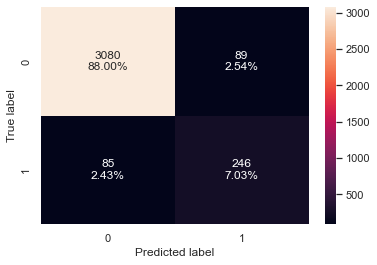

<IPython.core.display.Javascript object>

In [67]:
# creating confusion matrix
print("Optimized Confusion Matrix on Training")
confusion_matrix_sklearn_with_threshold(
    model, x_train, y_train, threshold=optimal_threshold_curve
)

Optimized Confusion Matrix on Test


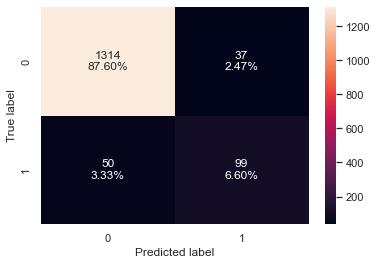

<IPython.core.display.Javascript object>

In [68]:
# creating confusion matrix
print("Optimized Confusion Matrix on Test")
confusion_matrix_sklearn_with_threshold(
    model, x_test, y_test, threshold=optimal_threshold_curve
)

The new confusion matrix:

True Positives (TP): We correctly predicted that the customer will purchase the loan: 99

True Negatives (TN): We correctly predicted that the customer will not purchase the loan: 1314

False Positives (FP): We incorrectly predicted that the customer will purchase the loan: 37 ("Type I error")

False Negatives (FN): We incorrectly predicted that the customer will not purchase the loan: 50 ("Type II error")

- <b>*We optimized our model by changing the threshold to 0.32 instead of 0.50 to increase the False Negatives and improve our recall performance from 0.563758 to 0.66443.  This will improve our predicted target customers who would want to purchase a loan from the bank.  This is a better model!*</b>

## Decision Tree Model

In [69]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [70]:
# create the full decision tree model
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [71]:
# Show model performance training chart
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, x_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

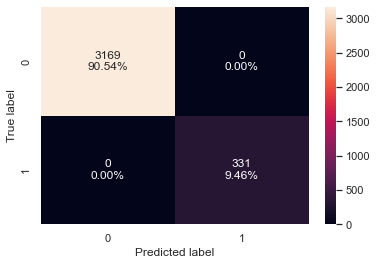

<IPython.core.display.Javascript object>

In [72]:
confusion_matrix_sklearn(dTree, x_train, y_train)

#### Checking model performance on test set

In [73]:
# Show model performance test chart
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, x_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.977333  0.872483   0.896552  0.884354

<IPython.core.display.Javascript object>

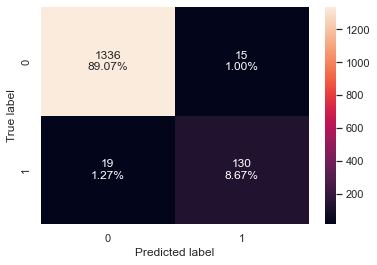

<IPython.core.display.Javascript object>

In [74]:
confusion_matrix_sklearn(dTree, x_test, y_test)

### - We can see that the training dataset is a perfect fit with Accuracy, Recall, Precision, and F1 all %100 but that is not the case with the test dataset.  This shows that our decision tree is overfited and very complex.

## Visualizing the Decision Tree

In [75]:
# create list of feature names
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Other County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano County', 'County_Sonoma Cou

<IPython.core.display.Javascript object>

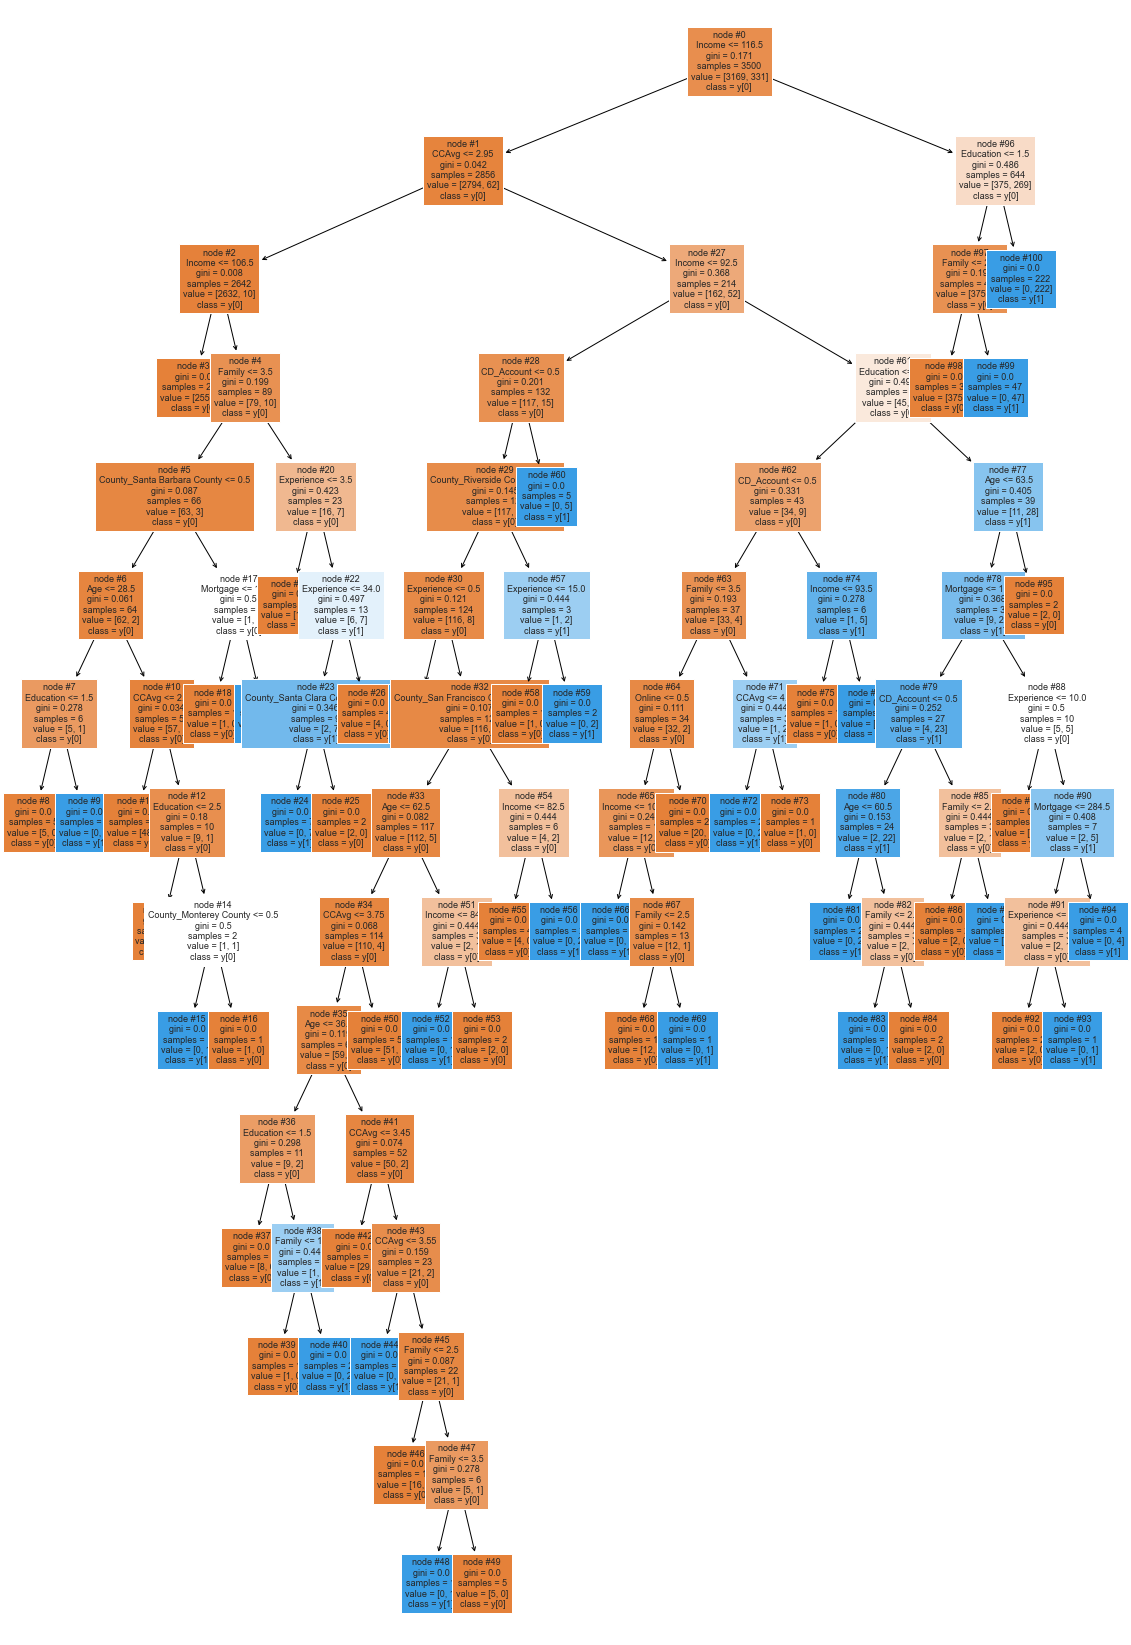

<IPython.core.display.Javascript object>

In [76]:
# Plot of full decision tree
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [77]:
# Text report showing the rules of a decision tree from above
print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- County_Santa Barbara County <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- County_Monterey County <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class

<IPython.core.display.Javascript object>

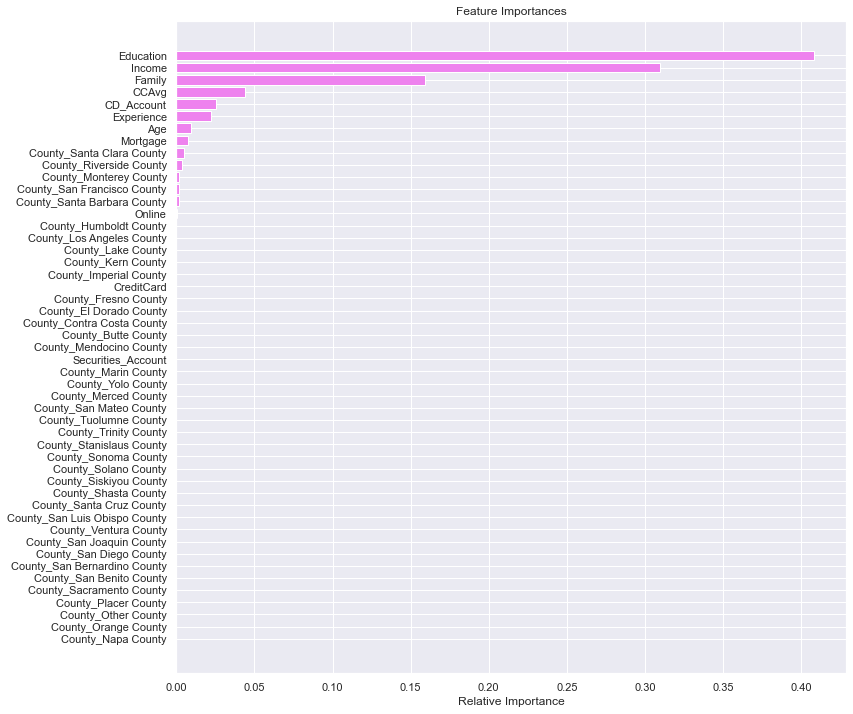

<IPython.core.display.Javascript object>

In [78]:
# Show Feature Importances variables chart
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### - From the chart above we can see that Education, Income, Family, CCAvg, CD_Account, Experience, Age, Mortgage are the most important variables and have a strong relationship with the dependent variable.

### - Santa Clara County, Riverside County, Monterey County, San Francisco County, and Santa Barbara County are also important variables and have a  relationship with the dependent variable as well. 

### - The rest of the variables does not contribute much in decision of the dependent variable (Personal Loan)

### - The full decision tree model is very complex and overfited.  We can use Pre-Pruning or Post-Pruning to make a simpler and better model.

## Using GridSearch for Hyperparameter tuning of our tree model

In [79]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 3, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

In [80]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": [np.arange(2, 5, 10), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10,
                       min_impurity_decrease=1e-06, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

In [81]:
# Show model performance training chart
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.988571  0.912387   0.964856  0.937888

<IPython.core.display.Javascript object>

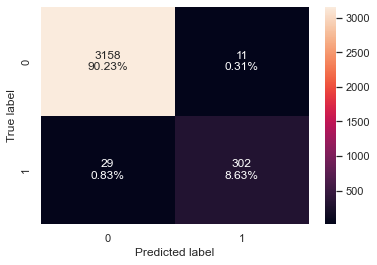

<IPython.core.display.Javascript object>

In [82]:
confusion_matrix_sklearn(estimator, x_train, y_train)

#### Checking model performance on test set

In [83]:
# Show model performance test chart
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0      0.98  0.852349   0.940741  0.894366

<IPython.core.display.Javascript object>

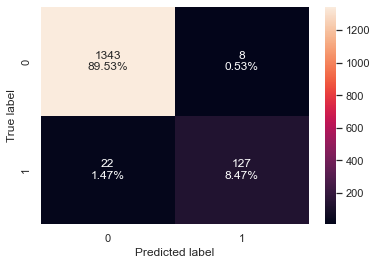

<IPython.core.display.Javascript object>

In [84]:
confusion_matrix_sklearn(estimator, x_test, y_test)

### Recall Performance before Pruning:  0.872483

### Recall Performance after Pre-Pruning:  0.852349

### After hyperparameter tuning the model the Recall performance has remained about the same but the model has become simpler.

## Visualizing the Decision Tree

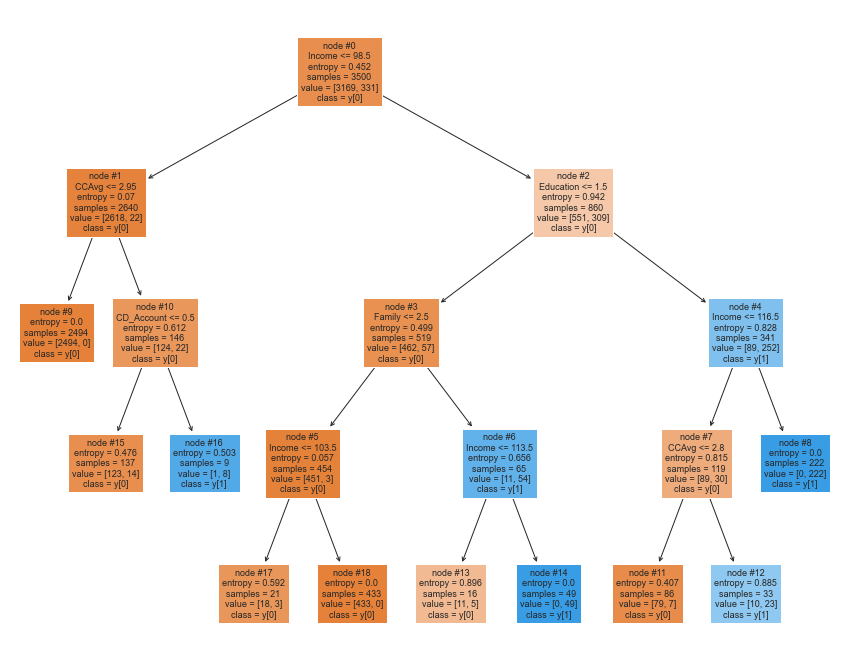

<IPython.core.display.Javascript object>

In [85]:
# plot Pre-Pruning Decision Tree
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

### We are getting a simplified tree after pre-pruning.

## Post-Pruning technique of our tree model

In [86]:
# Cost complexity pruning
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [87]:
# Display the ccp_alphas and impurities
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000187    0.000562
2     0.000269    0.001636
3     0.000273    0.002182
4     0.000274    0.004371
5     0.000359    0.005447
6     0.000381    0.005828
7     0.000381    0.006209
8     0.000381    0.006590
9     0.000381    0.006971
10    0.000381    0.007352
11    0.000435    0.007787
12    0.000476    0.008263
13    0.000514    0.009805
14    0.000578    0.012118
15    0.000582    0.012701
16    0.000607    0.013307
17    0.000621    0.013928
18    0.000811    0.017985
19    0.001552    0.019536
20    0.002333    0.021869
21    0.003024    0.024893
22    0.003294    0.028187
23    0.006473    0.034659
24    0.023866    0.058525
25    0.056365    0.171255

<IPython.core.display.Javascript object>

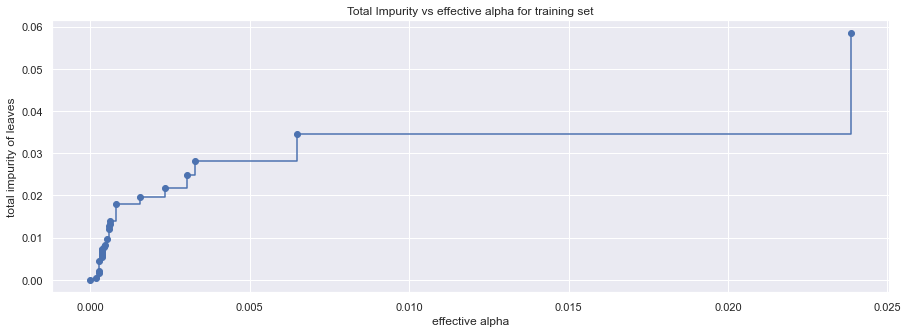

<IPython.core.display.Javascript object>

In [88]:
# Shows Total Impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [89]:
# We train a decision tree using the effective alphas.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


<IPython.core.display.Javascript object>

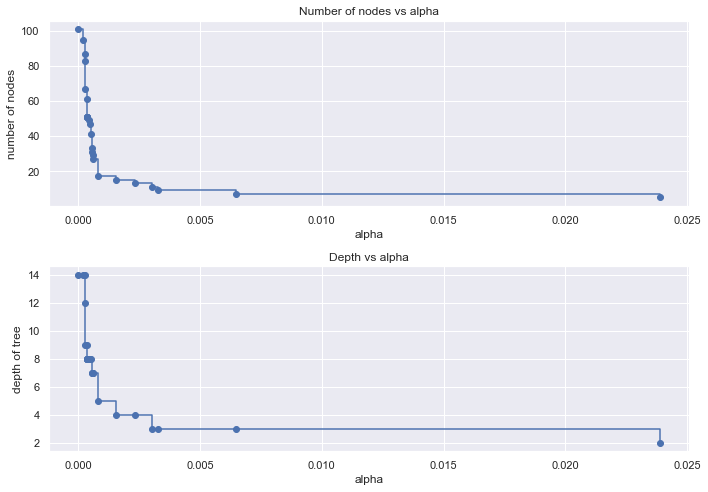

<IPython.core.display.Javascript object>

In [90]:
# For the remainder, we remove the last element in clfs and ccp_alphas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall vs alpha for training and testing sets

In [91]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [92]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

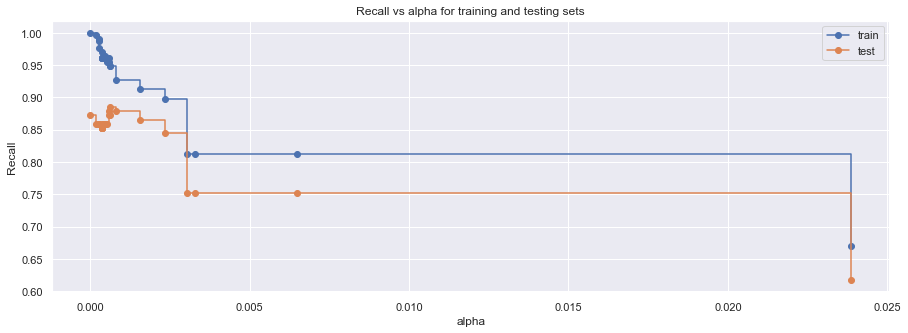

<IPython.core.display.Javascript object>

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [94]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [95]:
# Show model performance training chart
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy   Recall  Precision       F1
0  0.991714  0.94864    0.96319  0.95586

<IPython.core.display.Javascript object>

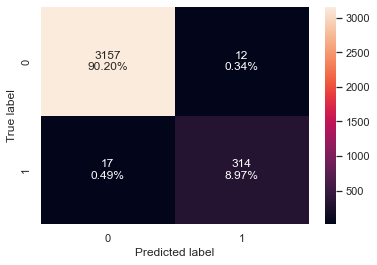

<IPython.core.display.Javascript object>

In [96]:
confusion_matrix_sklearn(best_model, x_train, y_train)

#### Checking model performance on test set

In [97]:
# Show model performance test chart
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, x_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0     0.982  0.885906   0.929577  0.907216

<IPython.core.display.Javascript object>

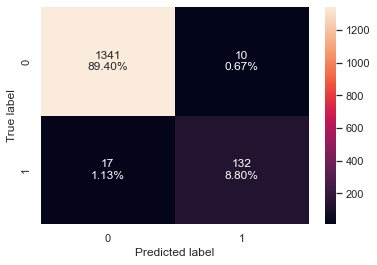

<IPython.core.display.Javascript object>

In [98]:
confusion_matrix_sklearn(best_model, x_test, y_test)

* With post-pruning we are getting good model performance on both training and test set.
* The recall has improved further than Pre-Pruning.

## Visualizing the Decision Tree

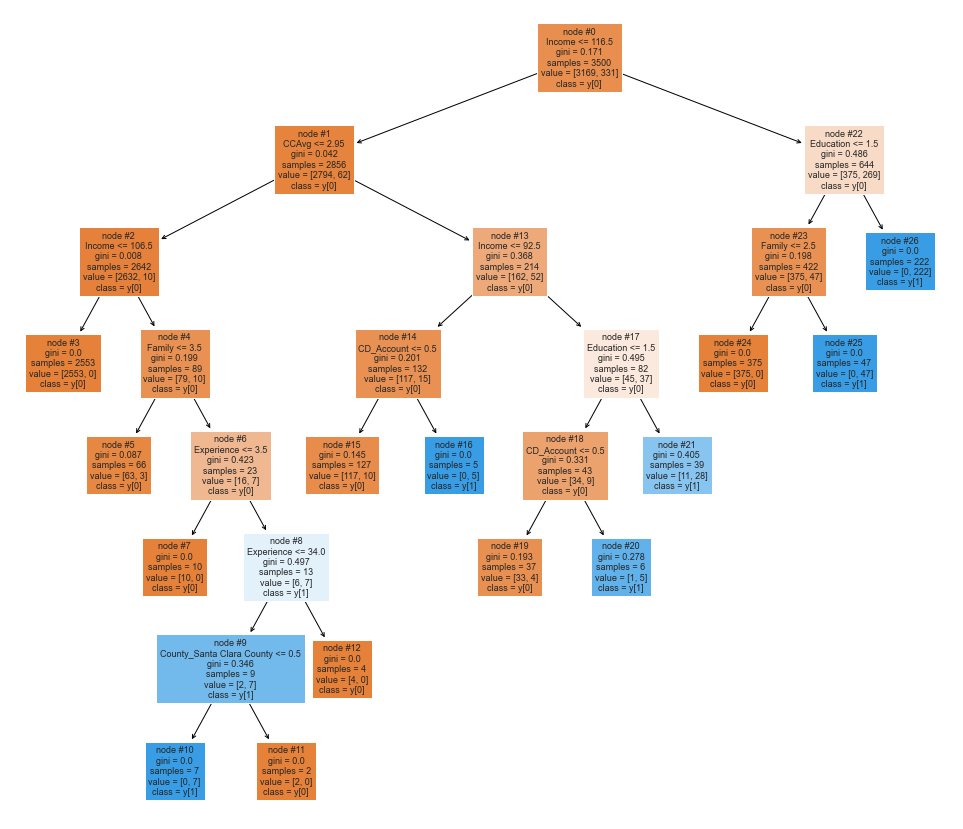

<IPython.core.display.Javascript object>

In [99]:
# Ploting the Post-Pruning Decision Tree
plt.figure(figsize=(17, 15))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

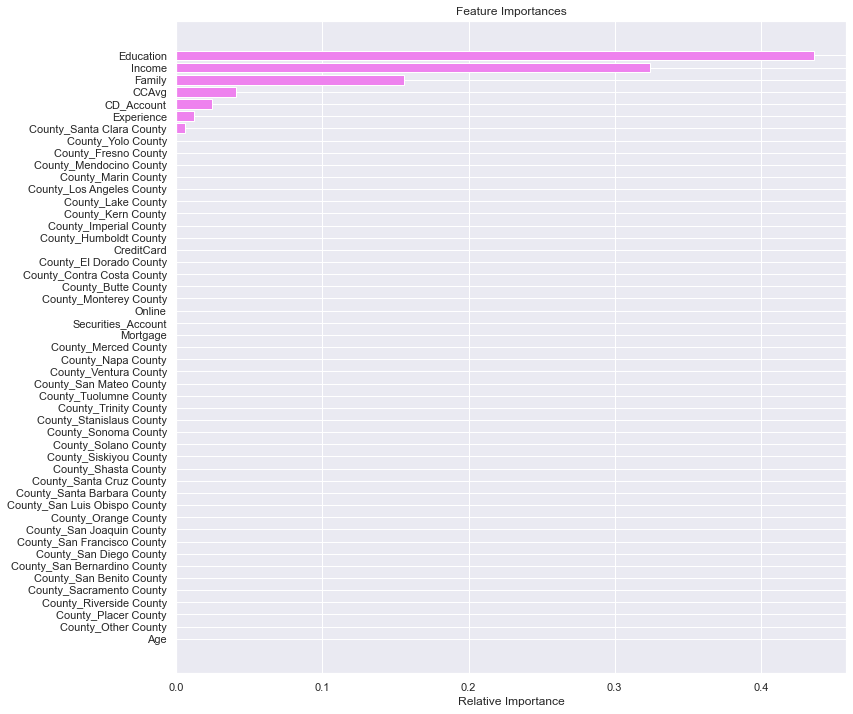

<IPython.core.display.Javascript object>

In [100]:
# Best model importants chart
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparing all the decision tree models

In [101]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.988571   
Recall                       1.0                     0.912387   
Precision                    1.0                     0.964856   
F1                           1.0                     0.937888   

           Decision Tree (Post-Pruning)  
Accuracy                       0.991714  
Recall                         0.948640  
Precision                      0.963190  
F1                             0.955860

<IPython.core.display.Javascript object>

In [102]:
# test performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.977333                     0.980000   
Recall                  0.872483                     0.852349   
Precision               0.896552                     0.940741   
F1                      0.884354                     0.894366   

           Decision Tree (Post-Pruning)  
Accuracy                       0.982000  
Recall                         0.885906  
Precision                      0.929577  
F1                             0.907216

<IPython.core.display.Javascript object>

## Insights & Recommendations for AllLife Bank

- <b>Decision tree with post-pruning is giving the highest recall on the test set.</b>
- <b>The tree with post pruning is not complex and easy to interpret.</b>
- Income is the root node in both Pre-Pruning and Post-Pruning.
- Post-Pruning is a little more complex than Pre-Pruning technique but gives a higher Recall score on test dataset.
- <b>In Post-Pruning, Income, Education, Family, CCAvg, CD_Account, Experience, and Santa Clara County are the only important variables.</b>
- In Logistic Regression the Recall score was 0.66443 compared to Post-Pruning Recall score of 0.885906.
- Small changes in dataset can have a large change to the structure in the decision tree.
- <b>My advice for the marketing team is to follow the decision tree for the Post-Pruning decision tree to help predict which customer would purchase a Personal Loan and target this group of customers.</b>
- Start with root node which splits customers Income of less than of equal to 116,500 into two groups and continuing spliting down the tree to the leaf nodes which the decision is made on whether to target the customer with a Personal Loan or not.
- For the right side of the root node Income greater than 116,500, we next look at Education less than or equal to 1.5 and split this group again.
- <b>*For Income greater than 116,500 and Education greater than 1.5, we would target this group of customers for a Personal Loan.*</b>
- For Income greater than 116,500 and Education less than or equal to 1.5, we next look at Family size less than or equal to 2.5
- <b>*For Income greater than 116,500, Education less than or equal to 1.5, and Family size greater than 2.5, we would target this group of customers for a Personal Loan.*</b>
- For Income greater than 116,500, Education less than or equal to 1.5, and Family size less than or equal to 2.5, we would <b>not</b> target this group of customers for a Personal Loan.
- <b>Follow the decision tree on the right side of Income root node just like we did on the left side until you get to leaf node of yes customer will want a Personal Loan (class = y[1]) or no customer will not want a Personal Loan (class = y[0]).</b>